# <font color=#3A86FF>Données nutritionnelles - Nettoyage </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)
* [Etude du jeu de donnees](#Etude-du-jeu-de-donnees)
* [Valeurs manquantes](#Valeurs-manquantes)
    * [Pourcentage valeurs manquantes](#Pourcentage-valeurs-manquantes)
    * [Histogramme taux valeurs manquantes](#Histogramme-taux-valeurs-manquantes)
    * [Donnees avec moins de 80% de NA](#Donnees-avec-moins-de-80%-de-valeurs-manquantes)
* [Filtrage des variables qualitatives ayant peu de valeurs uniques
](#Filtrage-des-variables-qualitatives-ayant-peu-de-valeurs-uniques
)
* [Variables quantitatives](#Variables-quantitatives)
    * [Diagrammes boxplot](#Diagrammes-boxplot)
    * [Diagrammes pairplot](#Diagrammes-pairplot)
    * [Heatmap](#Heatmap)
    * [Regression lineaire](#Regression-lineaire)
        * [Scores](#Scores)
        * [Prediction](#Prediction)
        * [Imputation des valeurs](#Imputation-des-valeurs)        
* [Variables qualitatives](#Variables-qualitatives)
    * [Diagrammes à barres](#Diagrammes-a-barres)
* [Bilan du nettoyage](#Bilan-du-nettoyage)
* [Ecriture fichier CSV](#Ecriture-fichier-CSV)
* [Reste à faire](#Reste-a-faire)

## <font color=#FB5607>Chargement des donnees</font>

In [1]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("../Dataset/fr.openfoodfacts.org.products.csv", encoding="utf-8",sep="\t", low_memory=False)

## <font color=#FB5607>Etude du jeu de donnees</font>

Obtenons un aperçu sur un échantillon (8 lignes) de données :

In [2]:
df.sample(10)

code                                                url  \
7356    0011210002500  http://world-fr.openfoodfacts.org/produit/0011...   
285194  7300400481731  http://world-fr.openfoodfacts.org/produit/7300...   
236545  3520115810174  http://world-fr.openfoodfacts.org/produit/3520...   
262962  4100290098124  http://world-fr.openfoodfacts.org/produit/4100...   
233258  3443705033633  http://world-fr.openfoodfacts.org/produit/3443...   
268697  4901630002272  http://world-fr.openfoodfacts.org/produit/4901...   
106864  0090525577217  http://world-fr.openfoodfacts.org/produit/0090...   
186693       29036059  http://world-fr.openfoodfacts.org/produit/2903...   
36747   0040000294801  http://world-fr.openfoodfacts.org/produit/0040...   
135039  0723175974340  http://world-fr.openfoodfacts.org/produit/0723...   

                creator   created_t      created_datetime last_modified_t  \
7356    usda-ndb-import  1489077734  2017-03-09T16:42:14Z      1489077734   
285194          kiliweb  1488363233  2017-03-01T10:13:53Z      1488363233   
236545             oc84  1412171556  2014-10-01T13:52:36Z      1413027528   
262962        twoflower  1476995889  2016-10-20T20:38:09Z      1476996083   
233258         sebleouf  1453563968  2016-01-23T15:46:08Z      1453567210   
268697         teolemon  1393186989  2014-02-23T20:23:09Z      1447272272   
106864  usda-ndb-import  1489076429  2017-03-09T16:20:29Z      1489076429   
186693            hangy  1428265549  2015-04-05T20:25:49Z      1428267044   
36747          stephane  1438276013  2015-07-30T17:06:53Z      1438284179   
135039  usda-ndb-import  1489055327  2017-03-09T10:28:47Z      1489055327   

       last_modified_datetime  \
7356     2017-03-09T16:42:14Z   
285194   2017-03-01T10:13:53Z   
236545   2014-10-11T11:38:48Z   
262962   2016-10-20T20:41:23Z   
233258   2016-01-23T16:40:10Z   
268697   2015-11-11T20:04:32Z   
106864   2017-03-09T16:20:29Z   
186693   2015-04-05T20:50:44Z   
36747    2015-07-30T19:22:59Z   
135039   2017-03-09T10:28:47Z   

                                             product_name generic_name  \
7356                              Buffalo Style Hot Sauce          NaN   
285194                          Wasa Knäckebrod Vezelrijk          NaN   
236545                                          Mont d'or    Mont d'or   
262962                 Frische Bergbauern Milch 3,5% Fett          NaN   
233258  Rillettes pur canard du Sud-Ouest au piment d'...          NaN   
268697                                     Sakuma's drops          NaN   
106864  Mctavish Shortbread, Twin Pack Football Chocol...          NaN   
186693                          Frühlings Mandeln Vanille          NaN   
36747                                        Peanut M&M's          NaN   
135039                                   Tea, Summer Rain          NaN   

                quantity  ... ph_100g fruits-vegetables-nuts_100g  \
7356                 NaN  ...     NaN                         NaN   
285194               NaN  ...     NaN                         NaN   
236545               NaN  ...     NaN                         NaN   
262962               1 l  ...     NaN                         NaN   
233258             180 g  ...     NaN                         NaN   
268697               NaN  ...     NaN                         NaN   
106864               NaN  ...     NaN                         NaN   
186693             200 g  ...     NaN                         NaN   
36747   3.40 OZ (96.4 g)  ...     NaN                         NaN   
135039               NaN  ...     NaN                         NaN   

       collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
7356                                NaN        NaN             NaN   
285194                              NaN        NaN             NaN   
236545                              NaN        NaN             NaN   
262962                              NaN        NaN             NaN   
233258                              NaN    

Quelle taille fait le jeu de données?

In [3]:
print(f"{df.shape} (lignes,col) - taille: {df.size} (nb elements)")

(320772, 162) (lignes,col) - taille: 51965064 (nb elements)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


*Voyons quelles sont les 162 colonnes et leur type?*

In [5]:
pd.set_option('display.max_rows', 162)
df.dtypes.head(10)

code                      object
url                       object
creator                   object
created_t                 object
created_datetime          object
last_modified_t           object
last_modified_datetime    object
product_name              object
generic_name              object
quantity                  object
dtype: object

## <font color=#FB5607>Valeurs manquantes</font>

*A présent, voyons combien de valeurs manquantes il y a par variable*

In [6]:
# df.isna().sum() est de type Series
sCountNA=df.isna().sum()
sCountNA.head(10)

code                          23
url                           23
creator                        2
created_t                      3
created_datetime               9
last_modified_t                0
last_modified_datetime         0
product_name               17762
generic_name              267977
quantity                  215953
dtype: int64

Pour determiner les variables qui ont "trop" de valeurs manquantes, calculons le taux de ces valeurs

### Pourcentage valeurs manquantes

In [7]:
import numpy as np
# nombre de ligne par variables : 320772
rowCount=len(df['water-hardness_100g']) 

# pourcentage de valeurs non vides par variable + tri par ordre decroissant
pctNA=(sCountNA/rowCount*100).sort_values(ascending=False)
pctNA=pctNA.astype('int') # conversion int

Nous avons calculé le pourcentage de valeurs manquantes mais aussi trié par taux décroissant\
pour identifier toutes les variables avec plus de 80% de valeurs manquantes

In [8]:
pctNA.head(10)

water-hardness_100g                      100
no_nutriments                            100
ingredients_that_may_be_from_palm_oil    100
nutrition_grade_uk                       100
nervonic-acid_100g                       100
erucic-acid_100g                         100
mead-acid_100g                           100
elaidic-acid_100g                        100
butyric-acid_100g                        100
caproic-acid_100g                        100
dtype: int64

Determinons la position de la variable qui correspond au seuil de 81%.\
Cette position permet de séparer les variable qui ont plus (ou moins) de 80% de valeurs manquantes.

In [9]:
# index de la limite à 80% de valeurs manquantes (NA)
limitCountNA=pctNA.index.get_loc(pctNA[pctNA==81].index.values[0])
limitCountNA

107

### Histogramme taux valeurs manquantes

On estime qu'au dessus d'un seuil de 80% de valeurs manquantes, le jeu de données n'est plus représentatif.

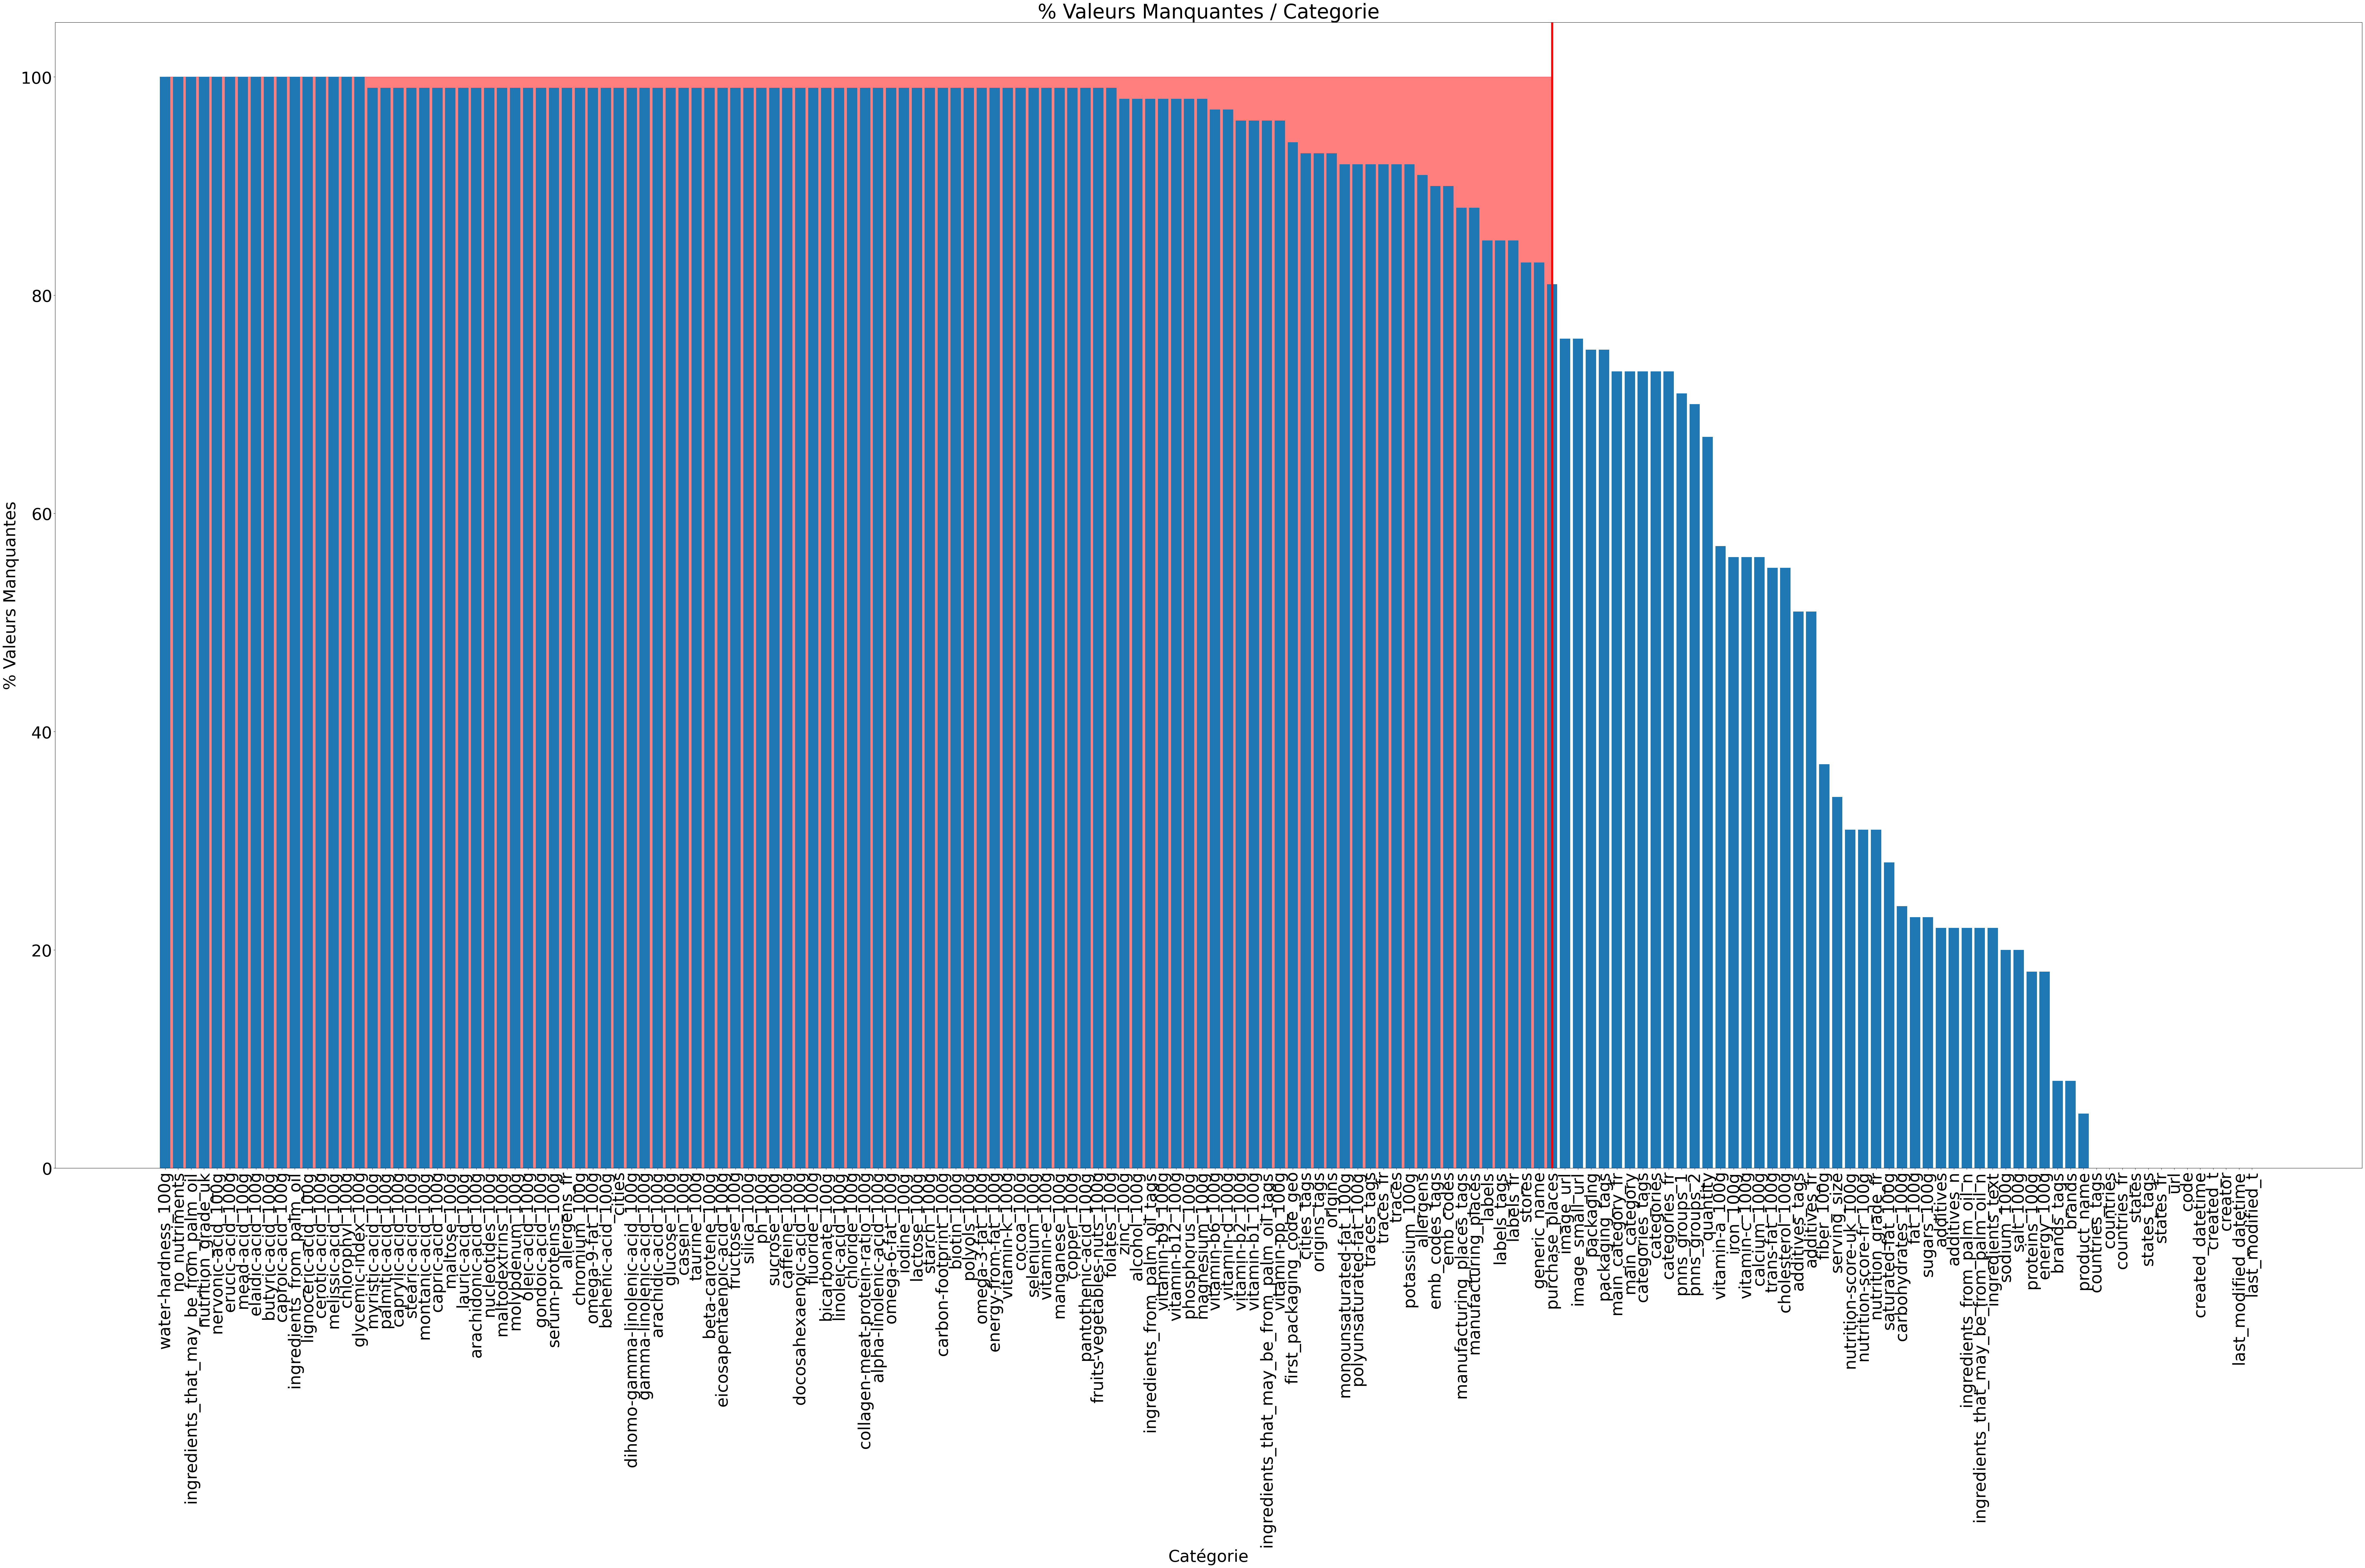

In [10]:
from matplotlib import pyplot as plt
# reset defaults
plt.rcdefaults()

# taille du graphique
plt.rcParams['font.size'] = '40.0'
plt.rcParams["figure.figsize"] = (100,50)
# bar chart
plt.bar(pctNA.index,pctNA)
# ligne limite des 80% de valeurs manquantes
plt.axvline(limitCountNA, color='r',lw=5)
plt.fill_betweenx(pctNA,limitCountNA,color="red",alpha=.5)

# rotation à la verticale des libelles
plt.xticks(rotation=90)

# Titre et libelles
plt.title('% Valeurs Manquantes / Categorie')
plt.xlabel('Catégorie')
plt.ylabel('% Valeurs Manquantes')

plt.show()

Les données dans la zone rouge (à  gauche) sont toutes les données dont le taux de valeurs manquantes est supérieur à 80%.\
Ces données sont donc écartées de notre étude.

### Donnees avec moins de 80% de valeurs manquantes

On ne garde donc que les colonnes ayant moins de 80% de valeurs manquantes

In [11]:
# identification des colonnes avec taux de valeurs manquantes < 81%
colonnesNA80=pctNA[pctNA<81]
colonnesNA80.index

Index(['image_url', 'image_small_url', 'packaging', 'packaging_tags',
       'main_category_fr', 'main_category', 'categories_tags', 'categories',
       'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'quantity',
       'vitamin-a_100g', 'iron_100g', 'vitamin-c_100g', 'calcium_100g',
       'trans-fat_100g', 'cholesterol_100g', 'additives_tags', 'additives_fr',
       'fiber_100g', 'serving_size', 'nutrition-score-uk_100g',
       'nutrition-score-fr_100g', 'nutrition_grade_fr', 'saturated-fat_100g',
       'carbohydrates_100g', 'fat_100g', 'sugars_100g', 'additives',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'ingredients_text',
       'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g',
       'brands_tags', 'brands', 'product_name', 'countries_tags', 'countries',
       'countries_fr', 'states', 'states_tags', 'states_fr', 'url', 'code',
       'created_datetime', 'created_t', 'creator', 'last_modified_datetime',

In [12]:
# filtrage
dfNA80=df[colonnesNA80.index]
dfNA80.head()

image_url image_small_url packaging packaging_tags main_category_fr  \
0       NaN             NaN       NaN            NaN              NaN   
1       NaN             NaN       NaN            NaN              NaN   
2       NaN             NaN       NaN            NaN              NaN   
3       NaN             NaN       NaN            NaN              NaN   
4       NaN             NaN       NaN            NaN              NaN   

  main_category categories_tags categories categories_fr pnns_groups_1  ...  \
0           NaN             NaN        NaN           NaN           NaN  ...   
1           NaN             NaN        NaN           NaN           NaN  ...   
2           NaN             NaN        NaN           NaN           NaN  ...   
3           NaN             NaN        NaN           NaN           NaN  ...   
4           NaN             NaN        NaN           NaN           NaN  ...   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-to-be-c...   
1  en:to-be-completed, en:nutrition-facts-complet...   
2  en:to-be-completed, en:nutrition-facts-complet...   
3  en:to-be-completed, en:nutrition-facts-complet...   
4  en:to-be-completed, en:nutrition-facts-complet...   

                                         states_tags  \
0  en:to-be-completed,en:nutrition-facts-to-be-co...   
1  en:to-be-completed,en:nutrition-facts-complete...   
2  en:to-be-completed,en:nutrition-facts-complete...   
3  en:to-be-completed,en:nutrition-facts-complete...   
4  en:to-be-completed,en:nutrition-facts-complete...   

                                           states_fr  \
0  A compléter,Informations nutritionnelles à com...   
1  A compléter,Informations nutritionnelles compl...   
2  A compléter,Informations nutritionnelles compl...   
3  A compléter,Informations nutritionnelles compl...   
4  A compléter,Informations nutritionnelles compl...   

                                                 url           code  \
0  http://world-fr.openfoodfacts.org/produit/0000...  0000000003087   
1  http://world-fr.openfoodfacts.org/produit/0000...  0000000004530   
2  http://world-fr.openfoodfacts.org/produit/0000...  0000000004559   
3  http://world-fr.openfoodfacts.org/produit/0000...  0000000016087   
4  http://world-fr.openfoodfacts.org/produit/0000...  0000000016094   

       created_datetime   created_t                     creator  \
0  2016-09-17T09:17:46Z  1474103866  openfoodfacts-contributors   
1  2017-03-09T14:32:37Z  1489069957             usda-ndb-import   
2  2017-03-09T14:32:37Z  1489069957             usda-ndb-import   
3  2017-03-09T10:35:31Z  1489055731             usda-ndb-import   
4  2017-03-09T10:34:13Z  1489055653             usda-ndb-import   

  last_modified_datetime last_modified_t  
0   2016-09-17T09:18:13Z      1474103893  
1   2017-03-09T14:32:37Z      1489069957  
2   2017-03-09T14:32:37Z      1489069957  
3   2017-03-09T10:35:31Z      1489055731  
4   2017-03-09T10:34:13Z      1489055653  

[5 rows x 54 columns]

## <font color=#FB5607>Filtrage des variables qualitatives ayant peu de valeurs uniques</font>

In [13]:
# identification des colonnes numériques et qualitatives
colonnesNum=dfNA80.select_dtypes(np.number).columns.tolist()
colonnesQual=dfNA80.select_dtypes('O').columns.tolist()

In [14]:
# filtrage des données qualitative + tri des colonnes par nombre de valeurs uniques
dfNA80ObjSorted=(dfNA80.describe(include='O')).sort_values(by='unique',axis=1,ascending=True)

# identification des colonnes qualitatives comportant peu de valeurs uniques (beaucoup de doublons)
dfNA80ObjUniq=dfNA80ObjSorted.loc[dfNA80ObjSorted.index=='unique']
dfNA80ObjUniq

nutrition_grade_fr pnns_groups_1 pnns_groups_2 countries_fr  \
unique                  5            14            42          722   

       countries_tags states_fr states states_tags countries creator  ...  \
unique            725      1021   1021        1021      1434    3535  ...   

       image_url last_modified_t last_modified_datetime created_t  \
unique     75836          180495                 180495    189567   

       created_datetime additives ingredients_text product_name     url  \
unique           189568    196069           205520       221347  320749   

          code  
unique  320749  

[1 rows x 34 columns]

In [15]:
# voyons les variables nutrition_grade_fr, pnns_groups-1, et pnns!groups-2
dfNA80['nutrition_grade_fr'].value_counts()

d    62763
c    45538
e    43030
a    35634
b    34245
Name: nutrition_grade_fr, dtype: int64

On conservera cette variable qui donne des indications importantes sur la qualité nutritionnelle

In [16]:
dfNA80['pnns_groups_1'].value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

In [17]:
dfNA80['pnns_groups_2'].value_counts()

unknown                             22624
One-dish meals                       5546
Sweets                               4698
Biscuits and cakes                   4561
Non-sugared beverages                4302
Cereals                              4106
Cheese                               4024
Dressings and sauces                 3602
Milk and yogurt                      3297
Processed meat                       3247
Chocolate products                   3109
Alcoholic beverages                  2909
Vegetables                           2840
Fish and seafood                     2638
Sweetened beverages                  2170
Appetizers                           2101
Fruits                               2068
Fruit juices                         1924
Bread                                1838
Meat                                 1694
Fats                                 1614
Breakfast cereals                    1408
vegetables                            934
Legumes                           

*On exclue les données qualitatives avec très peu de valeurs uniques (nutrition_grade_fr,pnns_groups_1,pnns_groups_2)*

In [18]:
# colonnes qualitatives sans les colonnes contenant beaucoup de doublons
colonnesQual=list(set(colonnesQual)-set(['pnns_groups_1','pnns_groups_2']))

## <font color=#FB5607>Variables quantitatives</font>

In [19]:
dfNum=dfNA80[colonnesNum]
dfNum.describe()

vitamin-a_100g      iron_100g  vitamin-c_100g   calcium_100g  \
count   137554.000000  140462.000000   140867.000000  141050.000000   
mean         0.000397       0.003652        0.023367       0.125163   
std          0.073278       0.214408        2.236451       3.318263   
min         -0.000340      -0.000260       -0.002100       0.000000   
25%          0.000000       0.000000        0.000000       0.000000   
50%          0.000000       0.001010        0.000000       0.035000   
75%          0.000107       0.002400        0.003700       0.106000   
max         26.700000      50.000000      716.981100     694.737000   

       trans-fat_100g  cholesterol_100g     fiber_100g  \
count   143298.000000     144090.000000  200886.000000   
mean         0.073476          0.020071       2.862111   
std          1.540223          0.358062      12.867578   
min         -3.570000          0.000000      -6.700000   
25%          0.000000          0.000000       0.000000   
50%          0.000000          0.000000       1.500000   
75%          0.000000          0.020000       3.600000   
max        369.000000         95.238000    5380.000000   

       nutrition-score-uk_100g  nutrition-score-fr_100g  saturated-fat_100g  \
count            221210.000000            221210.000000       229554.000000   
mean                  9.058049                 9.165535            5.129932   
std                   9.183589                 9.055903            8.014238   
min                 -15.000000               -15.000000            0.000000   
25%                   1.000000                 1.000000            0.000000   
50%                   9.000000                10.000000            1.790000   
75%                  16.000000                16.000000            7.140000   
max                  40.000000                40.000000          550.000000   

       carbohydrates_100g       fat_100g    sugars_100g    additives_n  \
count       243588.000000  243891.000000  244971.000000  248939.000000   
mean            32.073981      12.730379      16.003484       1.936024   
std             29.731719      17.578747      22.327284       2.502019   
min              0.000000       0.000000     -17.860000       0.000000   
25%              6.000000       0.000000       1.300000       0.000000   
50%             20.600000       5.000000       5.710000       1.000000   
75%             58.330000      20.000000      24.000000       3.000000   
max           2916.670000     714.290000    3520.000000      31.000000   

       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
count                248939.000000                            248939.000000   
mean                      0.019659                                 0.055246   
std                       0.140524                                 0.269207   
min                       0.000000                                 0.000000   
25%                       0.000000                                 0.000000   
50%                       0.000000                                 0.000000   
75%                       0.000000                                 0.000000   
max                       2.000000                                 6.000000   

         sodium_100g      salt_100g  proteins_100g   energy_100g  
count  255463.000000  255510.000000  259922.000000  2.611130e+05  
mean        0.798815       2.028624       7.075940  1.141915e+03  
std        50.504428     128.269454       8.409054  6.447154e+03  
min         0.000000       0.000000    -800.000000  0.000000e+00  
25%         0.025000       0.063500       0.700000  3.770000e+02  
50%         0.229000       0.581660       4.760000  1.100000e+03  
75%         0.541000       1.374140      10.000000  1.674000e+03  
max     25320.000000   64312.800000     430.000000  3.251373e+06

### Diagrammes boxplot

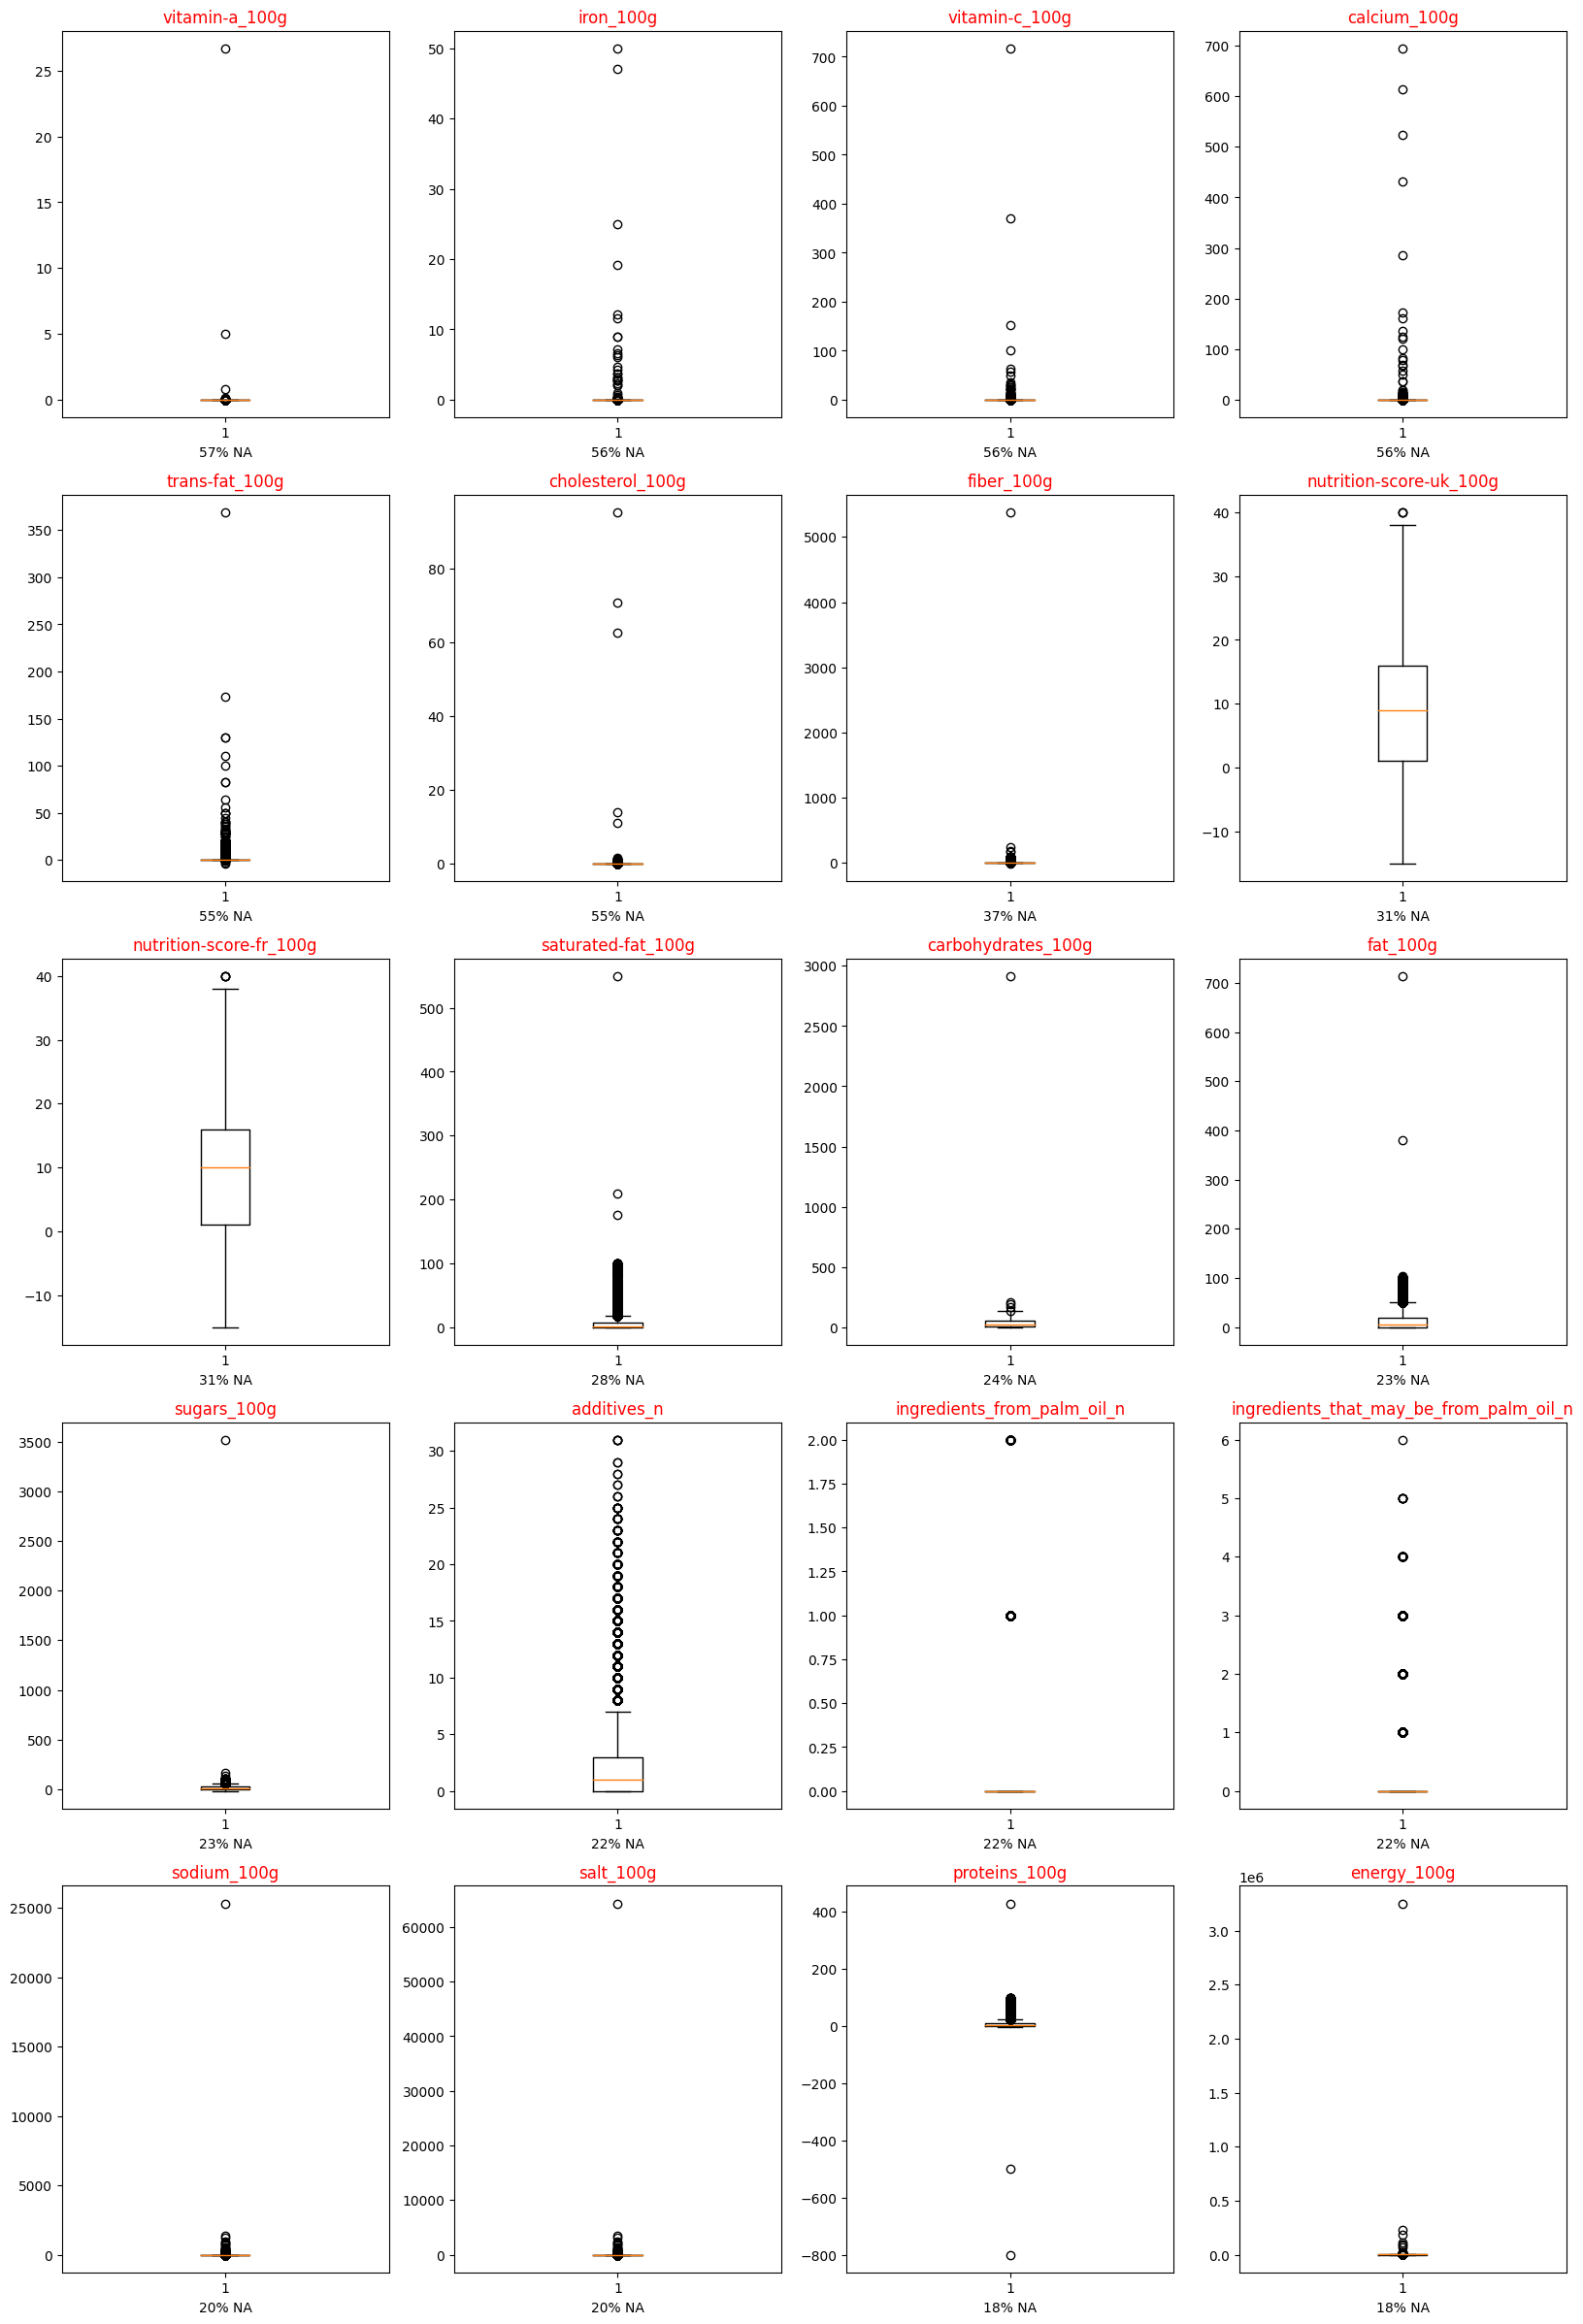

In [20]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = (100,40)

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,30))
axes=axes.flatten()

i=0
for x in dfNum.columns:
        #print(x) #debug
        # on dessine le boxplot en excluant les valeurs manquantes pour chaque variable quantitative
        axes[i].boxplot(dfNum[x].dropna())
        axes[i].set_title(x,color='red')
        axes[i].set_xlabel(str(colonnesNA80[x])+'% NA')
        i+=1

On remarque des valeurs atypiques pour les variables "energy_100g" et "proteins_100g"\
On écarte cette individu pour voir si le boxplot est plus lisible

In [21]:
#%%writefile helpers.py
# fonction qui retourne le mask qui retourne les lignes d'une Serie, correspondant aux outliers
def maskOutliers(s):
    """
    Fonction qui retourne le mask qui retourne les lignes d'une Serie, correspondant aux outliers

    Parameters
    ----------
    s : pandas Series
        une Serie de valeurs numériques

    Returns
    -------
    mask : Series
        une Serie de booleens correspondant au masque qui retourne les valeurs atypiques/Outliers
    """
    # premier Quantile
    Q1 = s.quantile(0.25)
    # 3e quantile
    Q3 = s.quantile(0.75)
    # Interquantile
    IQR = Q3 - Q1
    
    # les outliers sont toutes les valeurs qui sont inférieures à Q1-1.5*IQR et supérieure à  Q3+1.5*IQR
    mask=(s < (Q1 - 1.5 * IQR)) |(s > (Q3 + 1.5 * IQR))
    return mask

In [22]:
from helpers import *

mask=maskOutliers(dfNum['proteins_100g'])
mask.value_counts()

False    308180
True      12592
Name: proteins_100g, dtype: int64

In [23]:
# on mets à zero les outliers pour les exclure de l'etude
dfNum.loc[mask,'proteins_100g']=0

/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [24]:
mask=maskOutliers(dfNum['energy_100g'])
# on mets à zero les outliers pour les exclure de l'etude
dfNum.loc[mask,'energy_100g']=0

/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [25]:
dfNum['energy_100g'].isna().count()

320772

### Heatmap

In [26]:
# matrice de correlation sur les variables numériques
#dfCorr=dfNum[['nutrition-score-fr_100g','nutrition-score-uk_100g','sodium_100g','salt_100g','energy_100g','fat_100g']].corr()
dfCorr=dfNum.corr()

Pour confirmer/infirmer la relation entre ces couples, voyons les corrélations evéntuelles

In [27]:
# Heatmap de la matrice de correlation (avec precision à 2 decimales)
dfCorr.style.background_gradient(cmap='coolwarm').set_precision(2)

La matrice de correlation montre l'équivalence entre "nutrition-score-uk_100g" / "nutrition-score-fr_100g" et "salt_100g" / "sodium_100g"
=> on exclue les variables "nutrition-score-uk_100g" et "sodium_100g"\
=> on regenere la heatmap pour voir le résultat nettoyage

In [28]:
import copy
colonnesNum2=copy.deepcopy(colonnesNum)
colonnesNum2.remove("nutrition-score-uk_100g")
colonnesNum2.remove("sodium_100g")
dfNum2=dfNum[colonnesNum2]
dfCorr2=dfNum2.corr()
dfCorr2.style.background_gradient(cmap='coolwarm').set_precision(2)

Les couples suivants montrent les plus fortes correlation:
1. energy_100g / fat_100g
2. fat_100g / saturated-fat_100g
3. sugars_100g / carbohydrates_100g
4. energy_100g / fiber_100g
5. saturated-fat_100g / nutrition-score-fr_100g

### Diagrammes pairplot

Nous remarquons parmi l'ensemble des variables numériques la variable *nutrition-score-fr_100g*, qui semble noter la qualité de l'aliment.\
Pour la suite, nous étudions les corrélations des variables numériques par rapport à cette variable.

On utilisera les codes couleurs du logo Nutriscore pour anoter nos diagrammes pairplots avec la note nutriscore

<div>
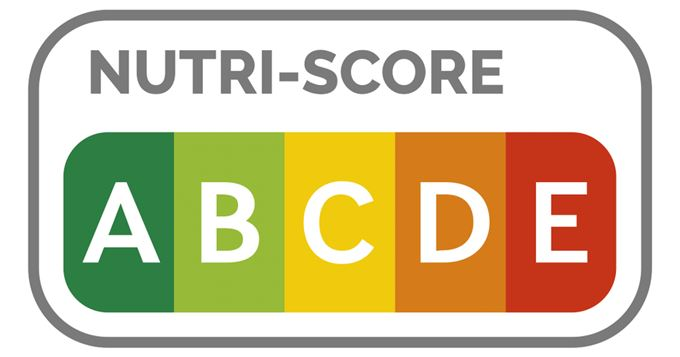
</div>

In [29]:
# preparation de la palette de couleur des pairplots qui reprend les codes couleurs hexa du logo nutriscore
custom_palette = {
'd': '#E08530',#Orange
 'c': '#F6CB45',#Jaune
 'e': '#D44B29',#Rouge
 'a': '#387E47',#Vert foncé
 'b': '#91B849' #Vert   
}
custom_palette

{'d': '#E08530',
 'c': '#F6CB45',
 'e': '#D44B29',
 'a': '#387E47',
 'b': '#91B849'}

In [30]:
# decoupage des variables numeriques en 2 groupes pour faciliter la visualisation des pairplots
chunks=np.array_split(colonnesNum2,2)

# on s'assure que le premier groupe contient bien les variables nutrition_grade_fr et nutrition-score-fr_100g
chunk0=chunks[0].tolist()
chunk0.append("nutrition_grade_fr")  if "nutrition_grade_fr" not in chunk0 else chunk0
chunk0.append("nutrition-score-fr_100g")  if "nutrition-score-fr_100g" not in chunk0 else chunk0

# on s'assure que le deuxième groupe contient bien les variables nutrition_grade_fr et nutrition-score-fr_100g
chunk1=chunks[1].tolist()
chunk1.append("nutrition_grade_fr")  if "nutrition_grade_fr" not in chunk1 else chunk1
chunk1.append("nutrition-score-fr_100g")  if "nutrition-score-fr_100g" not in chunk1 else chunk1

/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


10.873471975326538

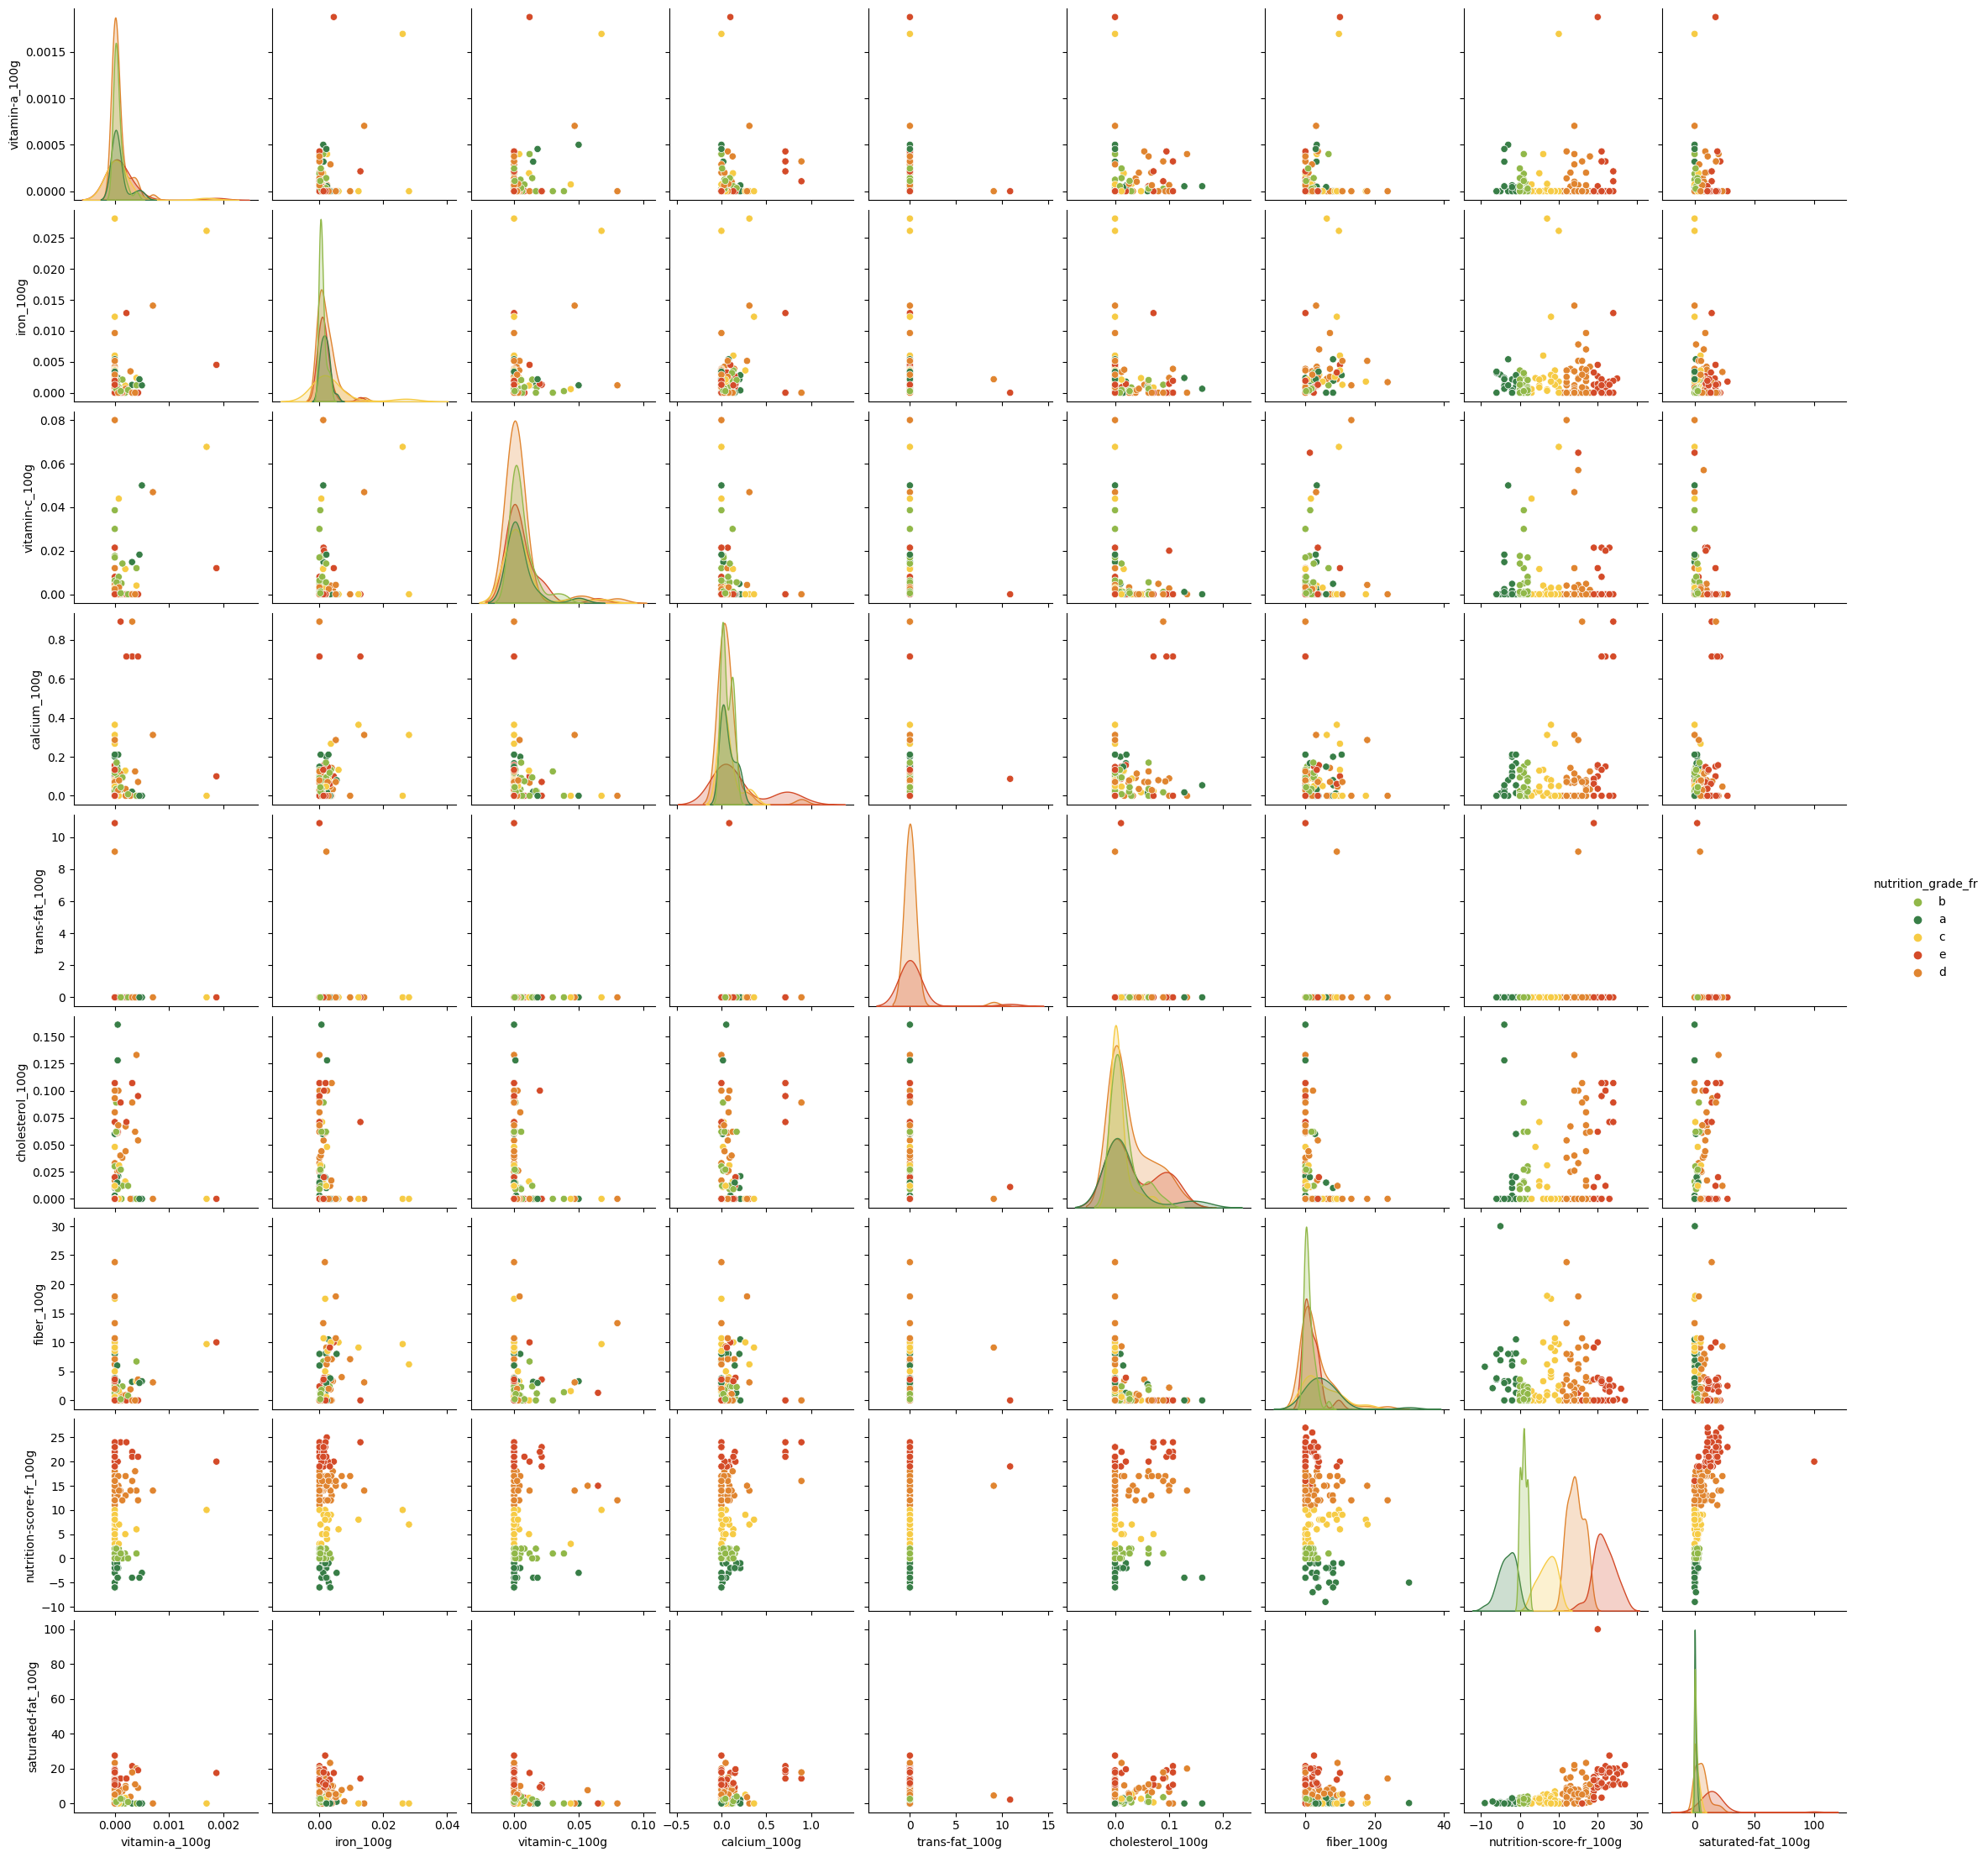

In [31]:
import time
import seaborn as sns
# pour accélerer l'affichage, on calcule les pairplot sur un echantillon de 300
now=time.time()
sns.pairplot(dfNA80[chunk0].sample(300),hue="nutrition_grade_fr",palette=custom_palette)
time.time()-now

/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/seaborn/dist

12.80646300315857

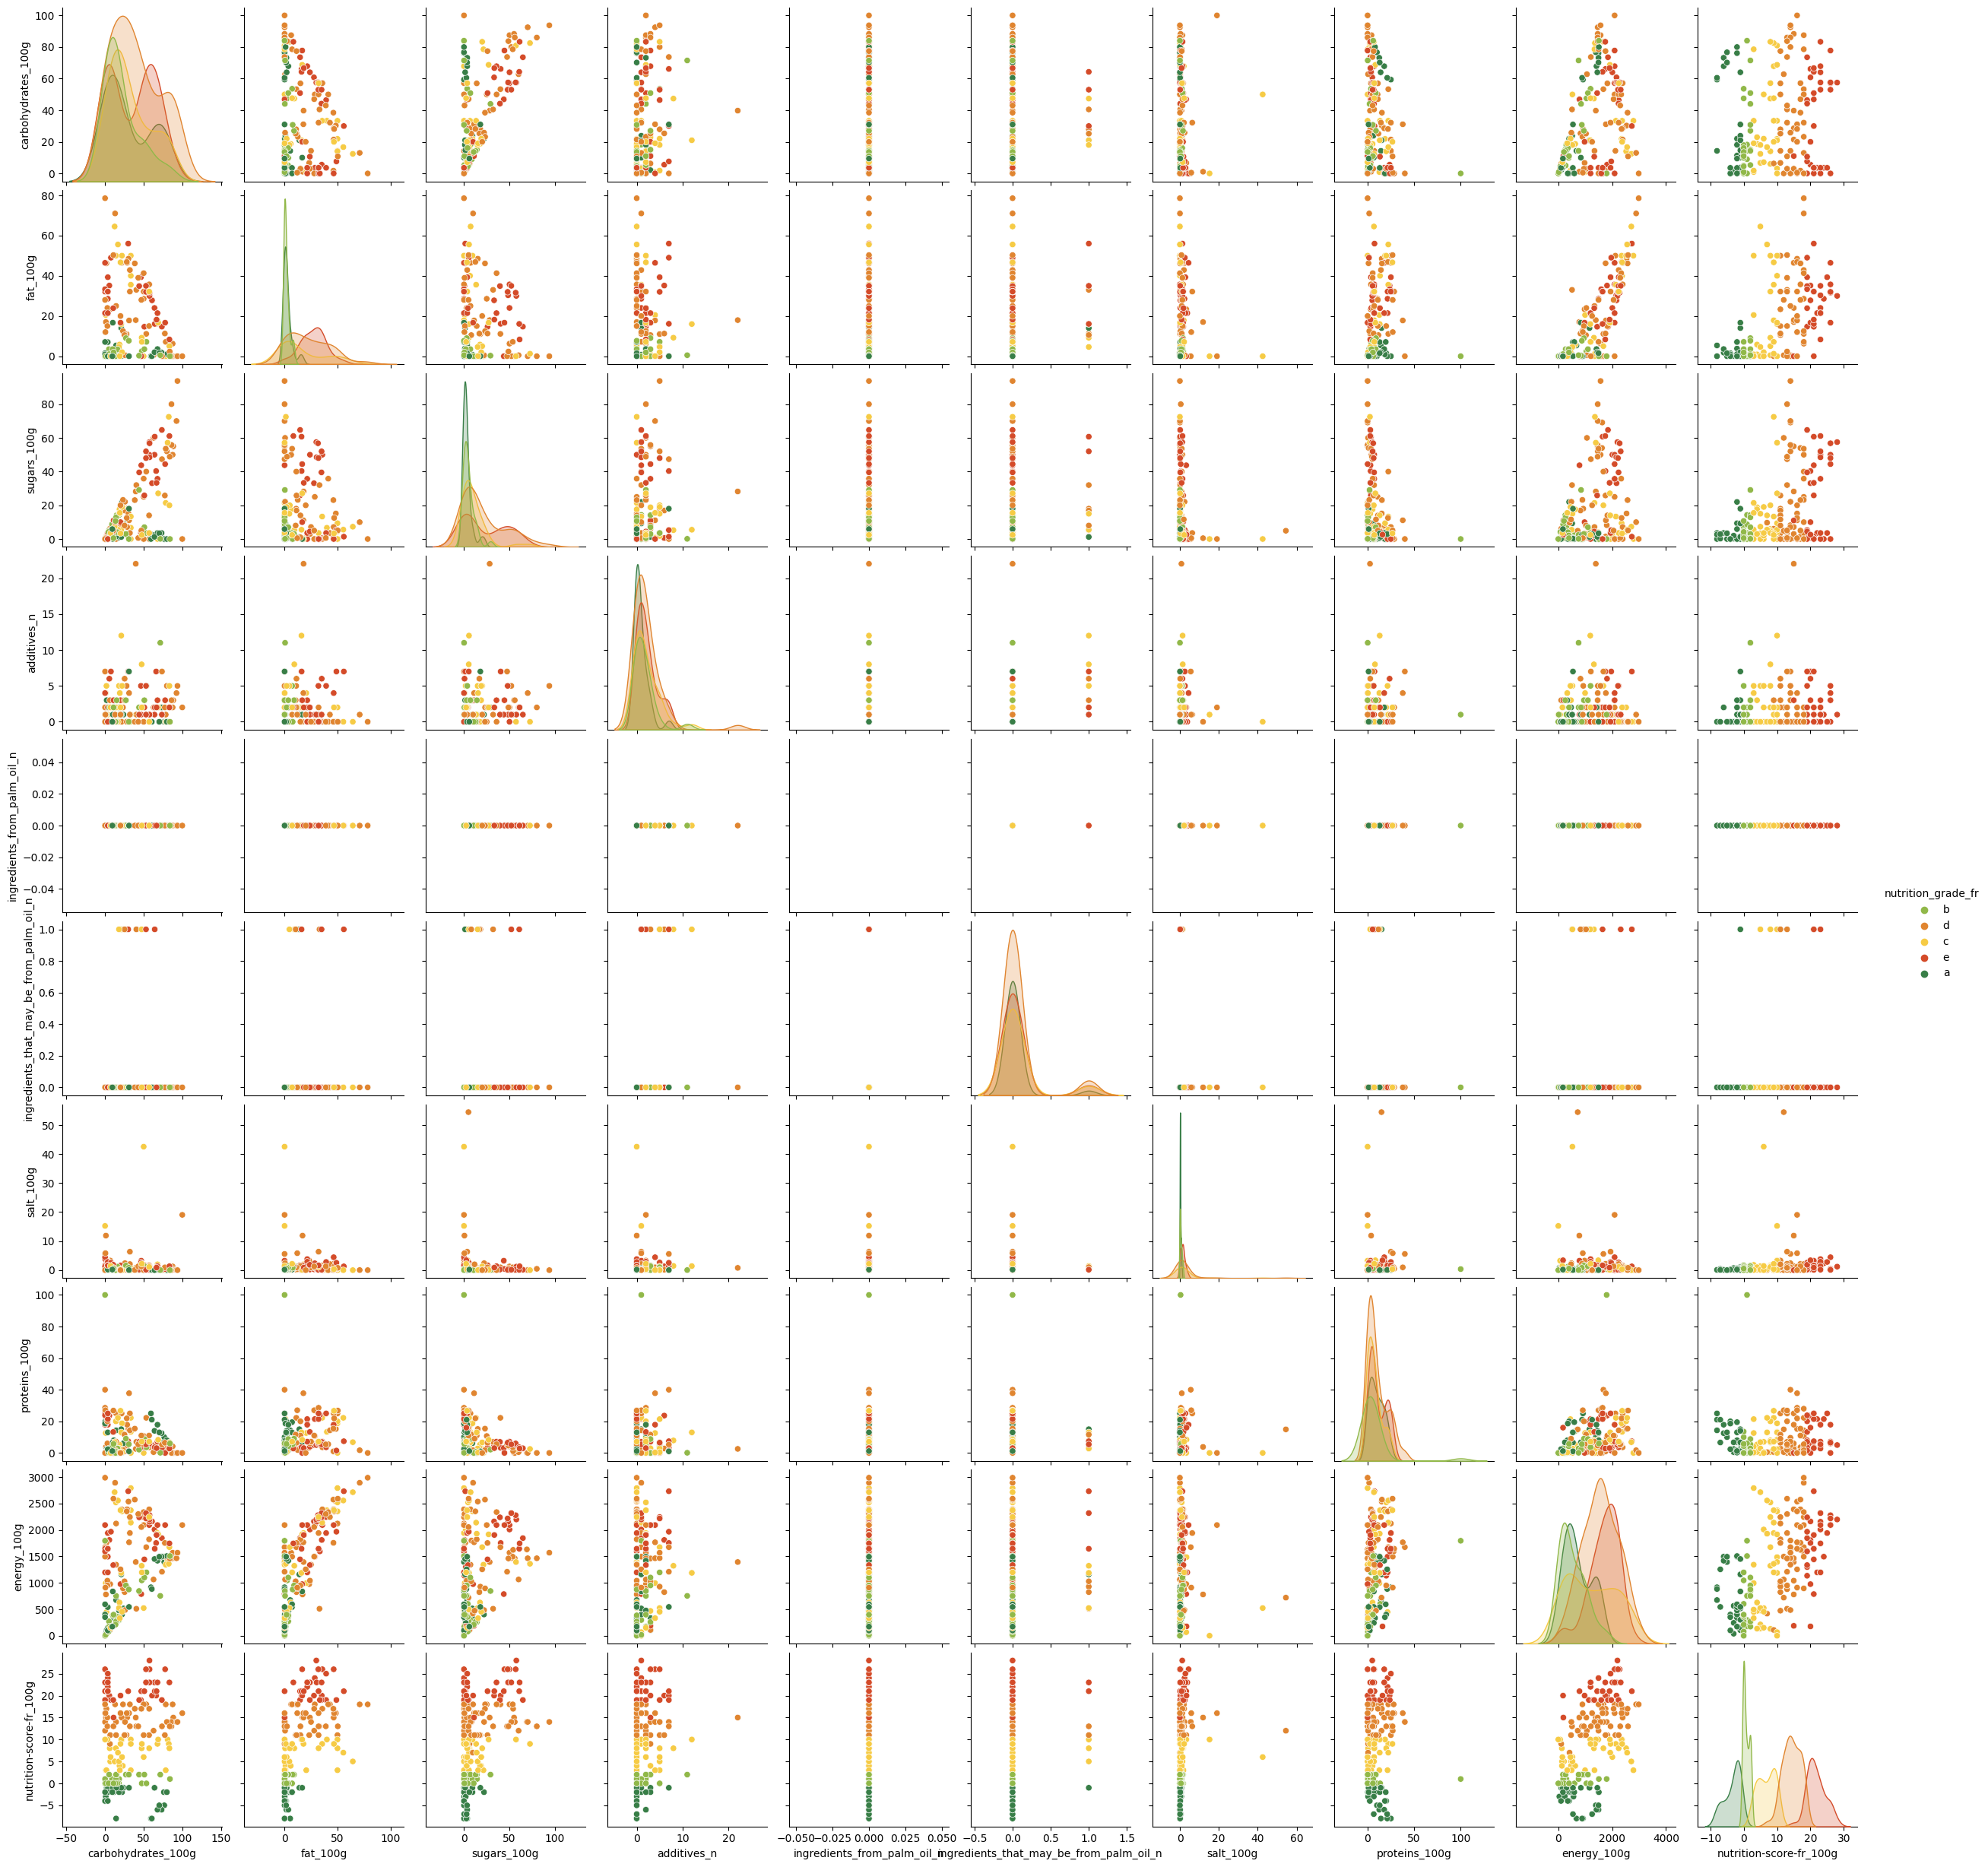

In [32]:
# pour accélerer l'affichage, on calcule les pairplot sur un echantillon de 300
now=time.time()
sns.pairplot(dfNA80[chunk1].sample(300),hue="nutrition_grade_fr",palette=custom_palette)
time.time()-now

En s'appuyant sur la heatmap, vue plus haut, et les pairplots on reconnait les variables qui contribuent tres peu au nutrition-score-fr-100g (qui apportent peu de valeur nutritives): ce sont
celles qui presentent une "ligne" plate en y=0
* ingredients_that_may_be_from_palm_oil_n
* ingredients_from_palm_oil_n
* trans-fat_100g

On les supprime donc de notre liste de variables et relançons un pairplot

In [33]:
colonnesNum3=list(set(colonnesNum2) - set(['ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n','trans-fat_100g']))
colonnesNum3.append("nutrition_grade_fr") if "nutrition_grade_fr" not in colonnesNum3 else colonnesNum3
dfNum3=dfNA80[colonnesNum3]

33.963985204696655

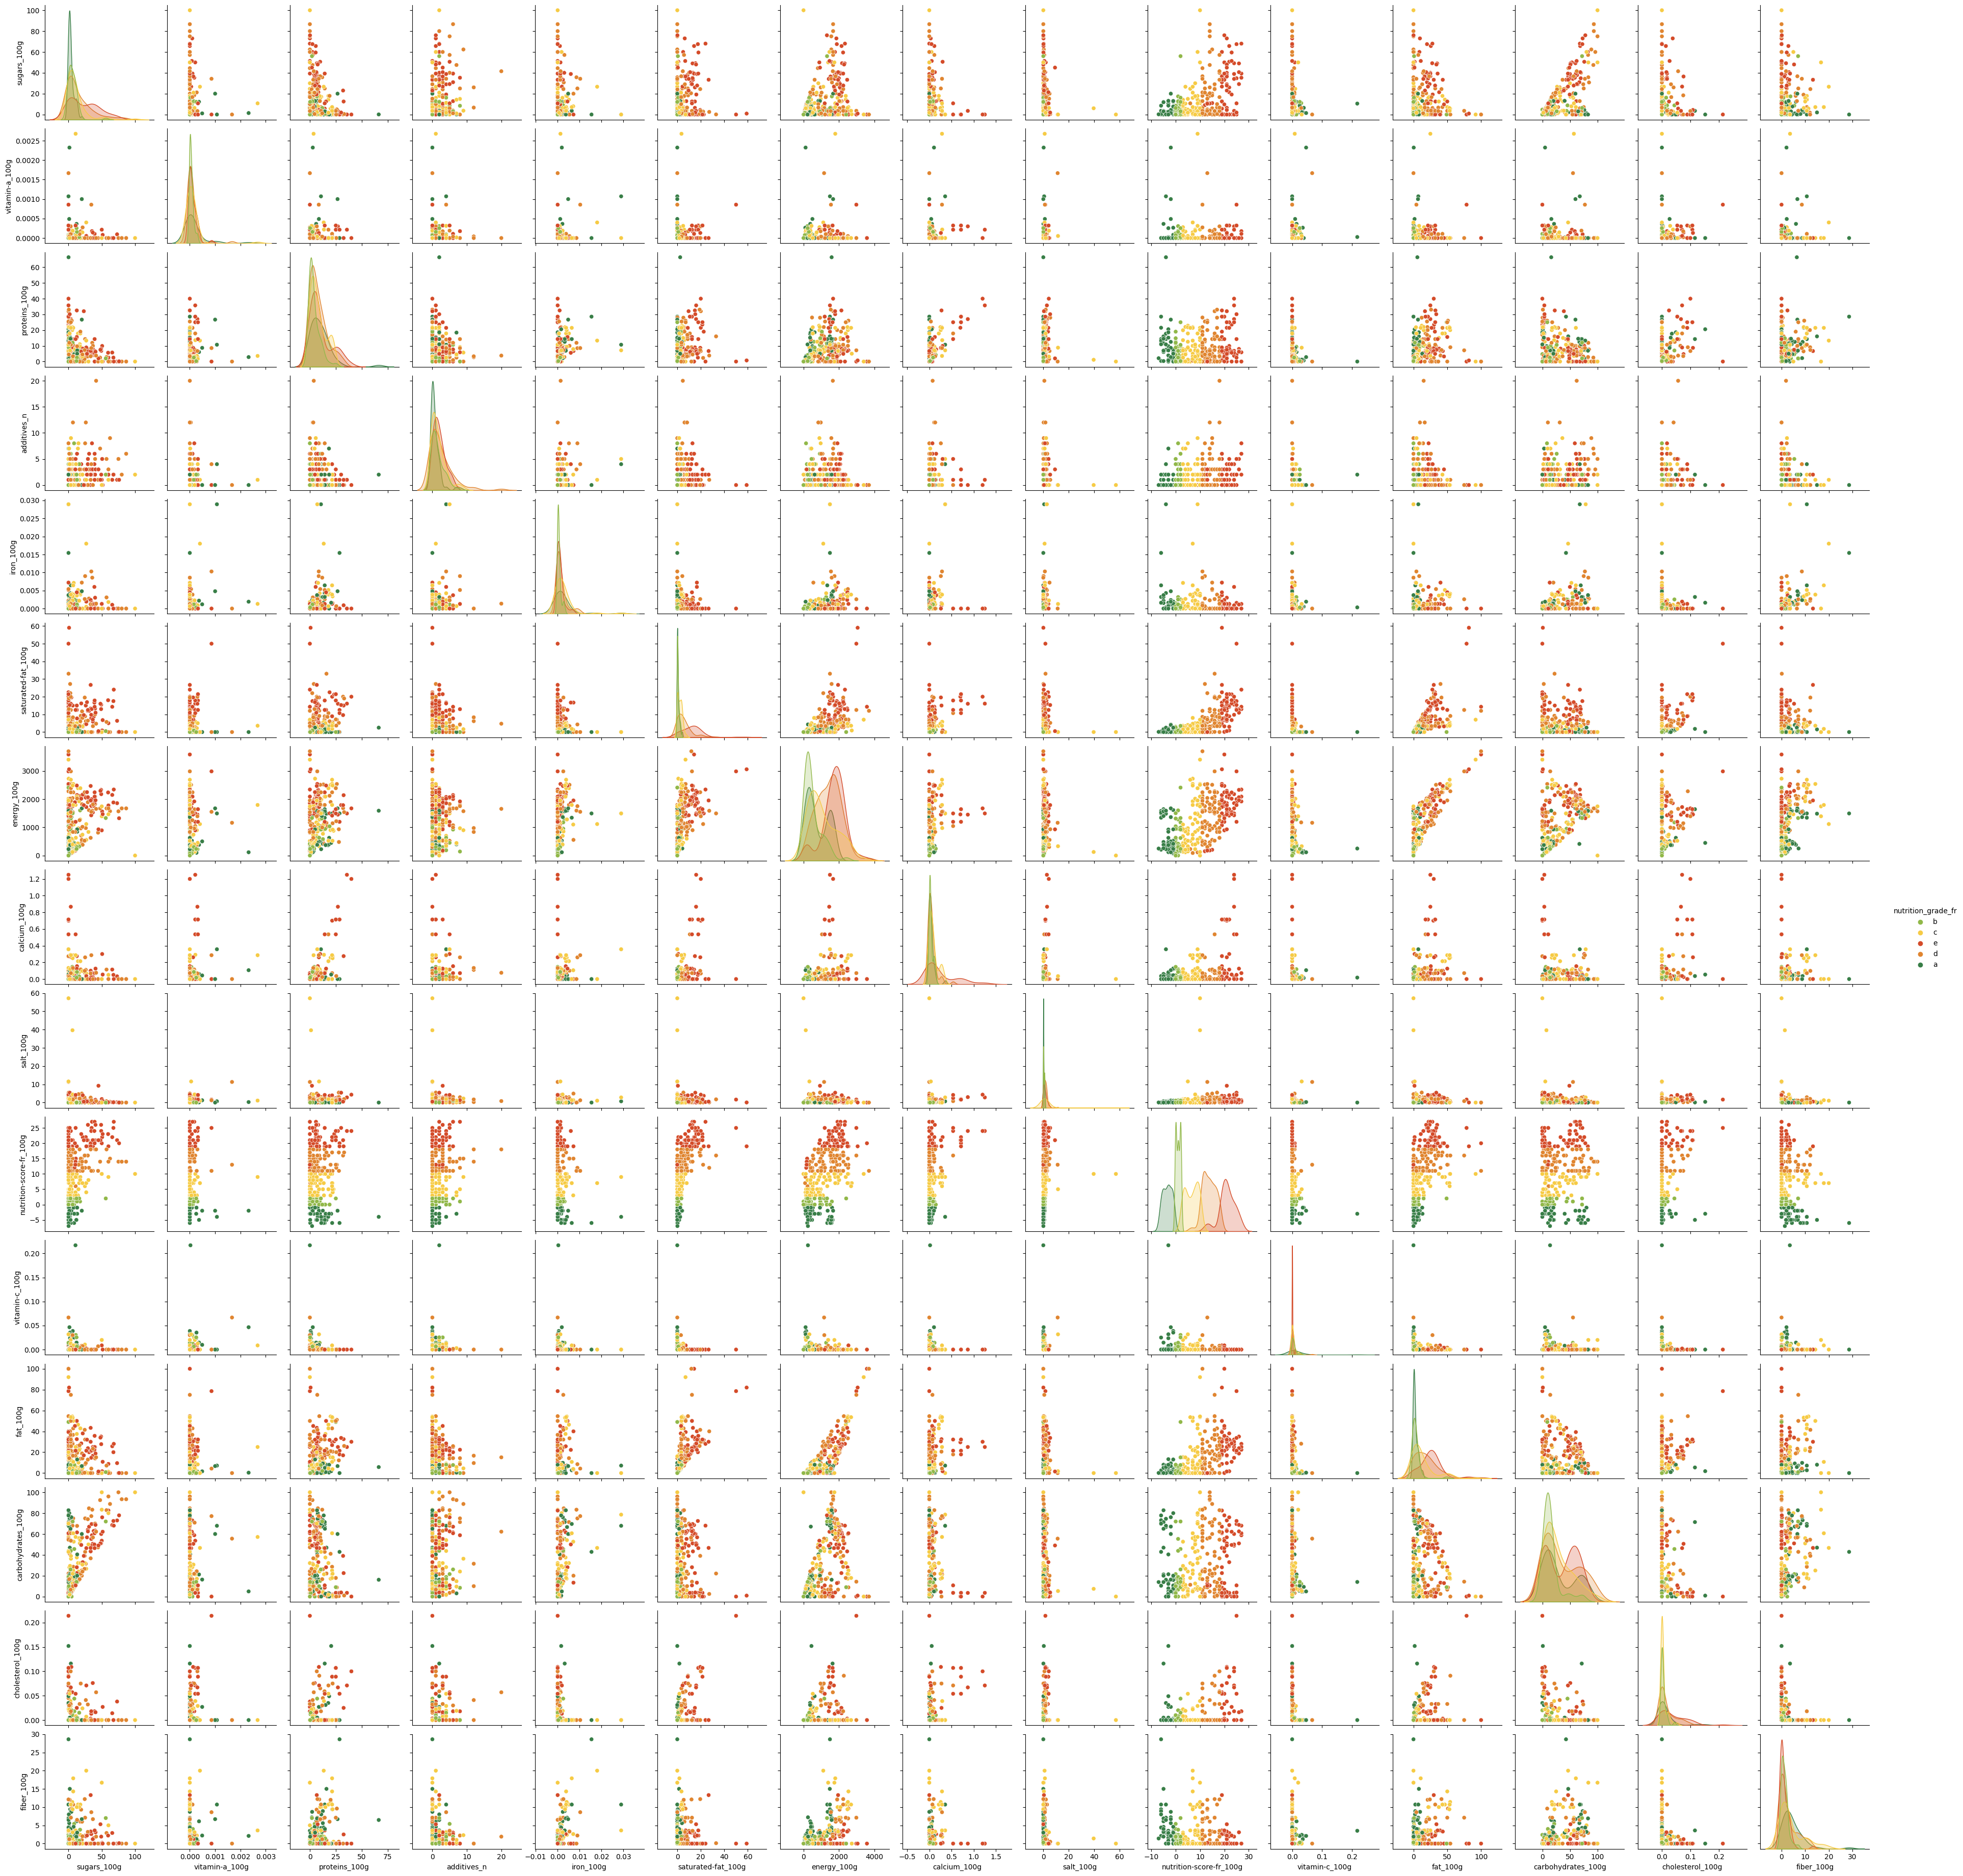

In [34]:
now=time.time()
sns.pairplot(dfNum3.sample(500),hue="nutrition_grade_fr",palette=custom_palette)
time.time()-now

#### Conclusion

A partir de la Heatmap et des pairplots, Les couples suivants montrent les plus fortes correlation:

1. energy_100g / fat_100g
2. fat_100g / saturated-fat_100g
3. sugars_100g / carbohydrates_100g
4. energy_100g / fiber_100g
5. saturated-fat_100g / nutrition-score-fr_100g

Il semblerait que les variables couplées pourraient servir à expliquer/compléter les variables manquantes

On remarque également que les variables suivantes contribuent/influencent le plus fortement la variable nutrition-score_100g

1. energy_100g
2. additives_n
3. proteins_100g
4. fat_100g
5. fiber_100g
6. sugars_100g
7. calcium_100g
8. carbohydrates_100g

### Regression lineaire

On va tenter de prédire les valeurs manquantes de saturated-fat_100g (28% NA)\
à partir des valeurs de fat_100g (23% NA)

#### Scores

In [35]:
from sklearn import linear_model
from sklearn import preprocessing

lm = linear_model.LinearRegression()

# fonction de regression linéaire, prenant la variable à prédire au format Dataframe (dfY), la variable de prédiction au format Dataframe(dfX), et retourne le modele
def lmModel(dfX,dfY):
    # marquage des lignes contenant les valeurs manquantes à prédire
    yRowMissing=dfY.isna()
    xRowPresent=dfX.notna()

    # masque des lignes manquantes pour la variable "saturated-fat_100g" mais présentes pour "fat_100g" (qui permettront de realiser les predictions)
    mask=yRowMissing.values & xRowPresent.values

    xName=dfX.columns.values[0]
    yName=dfY.columns.values[0]

    # Pour entrainer le modele, on utilise un df sur les 2 variables
    # en supprimant toutes les lignes contenant des NA
    df=dfNum[[xName,yName]].dropna()
    x=df[xName].values.reshape(df.shape[0],-1)
    y=df[yName].values.reshape(df.shape[0],-1)

    # on fit le modele
    lm.fit(x,y)

    return lm

In [36]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

dfX=dfNum3[["energy_100g"]]
dfY=dfNum3[["fat_100g"]]

# marquage des lignes contenant les valeurs manquantes à prédire
yRowMissing=dfY.isna()
xRowPresent=dfX.notna()

# masque des lignes manquantes pour la variable "saturated-fat_100g" mais présentes pour "fat_100g" (qui permettront de realiser les predictions)
mask=yRowMissing.values & xRowPresent.values

xName=dfX.columns.values[0]
yName=dfY.columns.values[0]

# Pour entrainer le modele, on utilise un df sur les 2 variables
# en supprimant toutes les lignes contenant des NA
df=dfNum[[xName,yName]].dropna()
x=df[xName].values.reshape(df.shape[0],-1)
y=df[yName].values.reshape(df.shape[0],-1)


# on fit le modele
lm.fit(x,y)


lm.coef_

array([[0.0158827]])

In [38]:
#print(f"x:{x.shape}-xCentreReduit:{xCentreReduit.shape} | y:{y.shape}-yCentreReduit:{yCentreReduit.shape}")

In [39]:
model=lmModel(dfNum3[["energy_100g"]],dfNum3[["fat_100g"]])

#R^2 score
model.coef_

array([[0.0158827]])

In [40]:
model=lmModel(dfNum3[["fat_100g"]],dfNum3[["saturated-fat_100g"]])

#R^2 score
model.coef_

array([[0.29697937]])

In [41]:
model=lmModel(dfNum3[["sugars_100g"]],dfNum3[["carbohydrates_100g"]])

#R^2 score
model.coef_

array([[0.92271747]])

Score R^2 très elevé => nous retenons ce couple pour imputer les valeurs

In [42]:
# fit regression lineaire sur le couple "energy_100g" / "fiber_100g"
model=lmModel(dfNum3[["energy_100g"]],dfNum3[["fiber_100g"]])

#R^2 score
model.coef_

array([[0.00164979]])

In [43]:
# fit regression lineaire sur le couple "energy_100g" / "fiber_100g"
model=lmModel(dfNum3[["saturated-fat_100g"]],dfNum3[["nutrition-score-fr_100g"]])

#R^2 score
model.coef_

array([[0.73795614]])

Bon score R^2 mais moins bons que le couple sugars_100g / carbohydrates_100g => on ne gardera pas cette prédiction

#### Prediction

In [44]:
xName="sugars_100g"
yName="carbohydrates_100g"

In [45]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

model=lmModel(dfNum3[[xName]],dfNum3[[yName]])

# vérification des dimensions de la serie predite
xRowPresent=dfNum3[[xName]].notna()
yRowMissing=dfNum3[[yName]].isna()

# masque des lignes manquantes pour la variable "saturated-fat_100g" mais présentes pour "fat_100g" (qui permettront de realiser les predictions)
mask=yRowMissing.values & xRowPresent.values

# prediction des valeurs manquantes de saturated-fat_100g à partir des valeurs de fat_100g
xPredict=(dfNum3[mask][xName]).values.reshape(-1,1)
# on centre réduit les variables

#xPredictCentreReduit = scaler.fit_transform(xPredict)
#yPredict=model.predict(xPredictCentreReduit)
#print(f"xPredict.shape={xPredictCentreReduit.shape} - yPredict.shape={yPredict.shape}")

yPredict=model.predict(xPredict)
print(f"xPredict.shape={xPredict.shape} - yPredict.shape={yPredict.shape}")

xPredict.shape=(17579, 1) - yPredict.shape=(17579, 1)


Text(0.5, 1.0, 'Predict x,y')

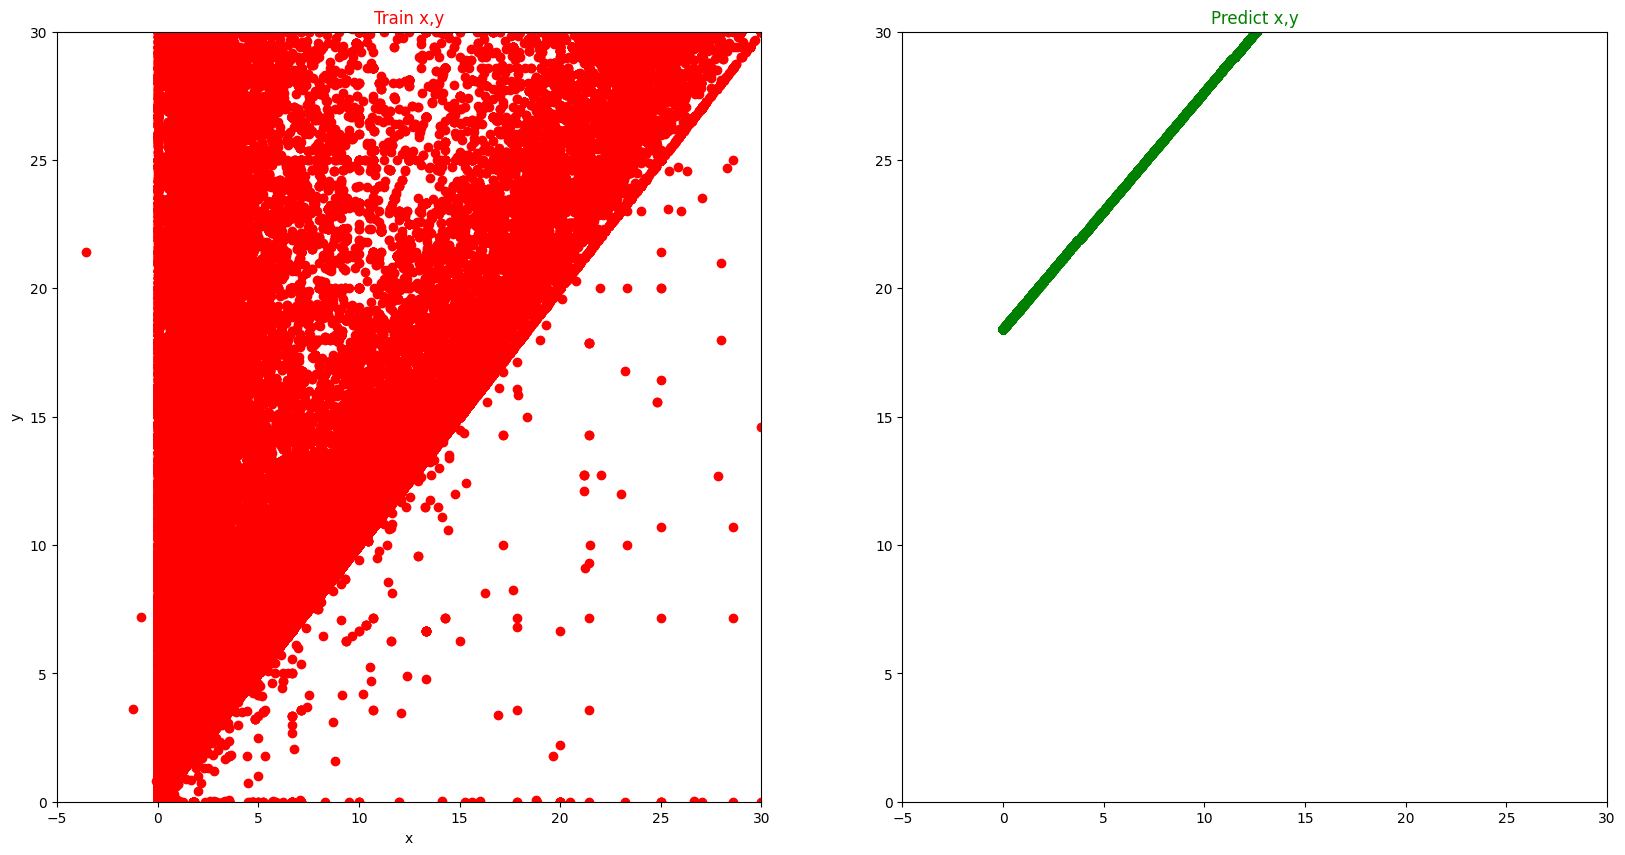

In [46]:
# SCATTER PLOT Variable à prédire / prédite
df=dfNum3[[xName,yName]].dropna()

x=df[xName].values.reshape(df.shape[0],-1)
y=df[yName].values.reshape(df.shape[0],-1)

xCentreReduit = scaler.fit_transform(x)
yCentreReduit = scaler.fit_transform(y)


plt.rcdefaults()
plt.rcParams['axes.grid'] = False
plt.rcParams["figure.figsize"] = (10,10)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

axes=axes.flatten()

#axes[0].scatter(xCentreReduit,yCentreReduit,color="red")
axes[0].scatter(x,y,color="red")
axes[0].set_title("Train x,y",color="red")
axes[0].set_xlim([-5, 30])
axes[0].set_ylim([0, 30])
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")


axes[1].set_xlim([-5, 30])
axes[1].set_ylim([0, 30])
axes[1].scatter(xPredict,yPredict,color="green")
axes[1].set_title("Predict x,y",color="green")

#### Imputation des valeurs

In [47]:
# copie par valeur
import copy
dfNumImput=copy.deepcopy(dfNum3)

In [53]:
aPredicted

array([[99.34023104],
       [64.83059752],
       [19.34062606],
       ...,
       [28.10644206],
       [19.34062606],
       [22.00727956]])

In [57]:
#tableau de valeurs predites pour la variable "saturated-fat_100g"
aPredicted=lm.predict(dfNum3[mask][xName].values.reshape(-1,1))

# index of non-null numbers
idx = dfNum3[mask].index

# make pandas series with idx and result
sPredicted = pd.Series(aPredicted[:,0], idx)
sPredicted.describe()
df=pd.DataFrame(sPredicted)
df.columns = [yName]
df

carbohydrates_100g
190              99.340231
191              64.830598
234              19.340626
307              30.136421
456              56.433869
...                    ...
320698           38.717693
320734           20.078800
320740           28.106442
320741           19.340626
320757           22.007280

[17579 rows x 1 columns]

In [58]:
# imputation avec les predictions de la régression lineare
dfNumImput.update(df)

In [59]:
dfNumImput[yName]

0           NaN
1         64.29
2         60.71
3         17.86
4         77.14
          ...  
320767      NaN
320768     0.00
320769      NaN
320770      NaN
320771     0.00
Name: carbohydrates_100g, Length: 320772, dtype: float64

#### Comparaison avant/après imputation

In [60]:
# variable imputée
yName="carbohydrates_100g"

In [61]:
# comparaison avant/après
print(f"variable '{yName}' - Nb NA avant: {dfNum[yName].isna().sum()/320772*100}% -> Nb NA après:{dfNumImput[yName].isna().sum()/320772*100}%")

variable 'carbohydrates_100g' - Nb NA avant: 24.06195054431185% -> Nb NA après:18.58173406656441%


In [62]:
print(f"variable '{yName} - Original")
dfNum[yName].describe()

variable 'carbohydrates_100g - Original


count    243588.000000
mean         32.073981
std          29.731719
min           0.000000
25%           6.000000
50%          20.600000
75%          58.330000
max        2916.670000
Name: carbohydrates_100g, dtype: float64

In [63]:
print(f"variable '{yName} - Imputé")
dfNumImput[yName].describe()

variable 'carbohydrates_100g - Imputé


count    261167.000000
mean         32.092911
std          29.817441
min           0.000000
25%           6.670000
50%          21.430000
75%          57.140000
max        3266.383417
Name: carbohydrates_100g, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f29c97f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f29c94040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f29c977c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f29c945b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f29c94880>],
 'means': []}

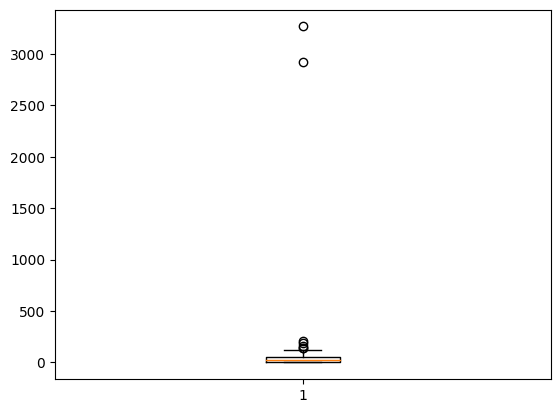

In [64]:
# boxplot de la variable après imputation
plt.rcdefaults()
plt.boxplot(dfNumImput[[yName]].dropna())
#dfNumImput[['carbohydrates_100g']].dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f2a1bf6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f0bf047c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f2a1bf8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f0bf04940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f0bf04130>],
 'means': []}

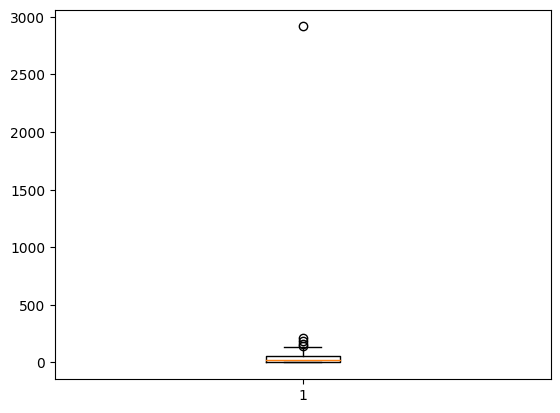

In [65]:
# boxplot de la variable avant imputation
plt.rcdefaults()
plt.boxplot(dfNum[[yName]].dropna())

## <font color=#FB5607>Variables qualitatives</font>

In [66]:
dfQual=dfNA80[colonnesQual]
dfQual.shape

(320772, 32)

In [67]:
dfQual.describe()

nutrition_grade_fr   created_t           code      serving_size  \
count              221210      320769         320749            211331   
unique                  5      189567         320749             25423   
top                     d  1489055829  0074175020033  240 ml (8 fl oz)   
freq                62763          20              1              5496   

                                                image_url  \
count                                               75836   
unique                                              75836   
top     http://fr.openfoodfacts.org/images/products/30...   
freq                                                    1   

                         ingredients_text    packaging_tags last_modified_t  \
count                              248962             78961          320772   
unique                             205520             12064          180495   
top     Carbonated water, natural flavor.  sachet,plastique      1439141742   
freq                                  222              3959              33   

                                     categories_fr product_name  ...  \
count                                        84411       303010  ...   
unique                                       21152       221347  ...   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits    Ice Cream  ...   
freq                                           802          410  ...   

                                                additives  \
count                                              248905   
unique                                             196069   
top      [ extra-virgin-olive-oil -> en:extra-virgin-o...   
freq                                                  397   

                                          image_small_url  \
count                                               75836   
unique                                              75836   
top     http://fr.openfoodfacts.org/images/products/50...   
freq                                                    1   

            created_datetime                                  categories  \
count                 320763                                       84410   
unique                189568                                       36982   
top     2017-03-09T16:32:00Z  Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq                      20                                         301   

       brands_tags packaging    countries_tags     brands  \
count       292352     78960            320492     292360   
unique       50253     14547               725      58784   
top      carrefour    Carton  en:united-states  Carrefour   
freq          3149      2153            172998       2978   

       last_modified_datetime main_category  
count                  320772         84366  
unique                 180495          3543  
top      2015-08-09T17:35:42Z  en:beverages  
freq                       33          6054  

[4 rows x 32 columns]

On constate que le dataframe dfQual contient des centaines de milliers de valeurs distinctes par variables.\
Pour simplifier le dataframe, nous créeons une function qui calcule la fréquence de valeur de chaque variable d'un dataframe\
Et catégorise dans la variable 'Autre' toutes les occurences en dessous du seuil ('threshold') choisi.

In [68]:
import pickle
with open('./dfQual.pkl', 'rb') as f:
    dfQual = pickle.load(f)

In [69]:
dfQual.columns

Index(['states', 'brands', 'quantity', 'url', 'states_tags',
       'created_datetime', 'categories', 'countries_tags', 'states_fr',
       'main_category', 'creator', 'packaging_tags', 'image_small_url',
       'packaging', 'brands_tags', 'last_modified_datetime', 'additives_fr',
       'countries', 'code', 'image_url', 'categories_tags', 'created_t',
       'categories_fr', 'main_category_fr', 'ingredients_text',
       'additives_tags', 'serving_size', 'additives', 'product_name',
       'last_modified_t', 'nutrition_grade_fr', 'countries_fr'],
      dtype='object')

In [70]:
#%%timeit
dfQual.groupby("nutrition_grade_fr").agg({
    "brands":"count",
    "additives_fr":"count"
})

brands  additives_fr
nutrition_grade_fr                      
a                    34975         13239
b                    33501         17754
c                    44526         25687
d                    61526         39721
e                    42044         29781

### Diagrammes a barres

In [71]:
# fonction mode qui agrege les variables qui sont sous un seuil 'threshold'(pour les très gros dataframe qui ont du mal à plotter)
def summarizeFrequenciesDf(df,threshold):
    dfFrequencies=df.value_counts(normalize=True) # frequence normalisée des valeurs de chaque variable
    mask = dfFrequencies>threshold # masque sur les fréquences > seuil
    dfTail= dfFrequencies.loc[~mask].sum()
    dfFrequencies=dfFrequencies.loc[mask] # filtre sur les fréquences < seuil
    dfFrequencies['Autres']=dfTail # ajout des fréquences > seuil agregées dans la categorie 'Autre'
    return pd.DataFrame(dfFrequencies)

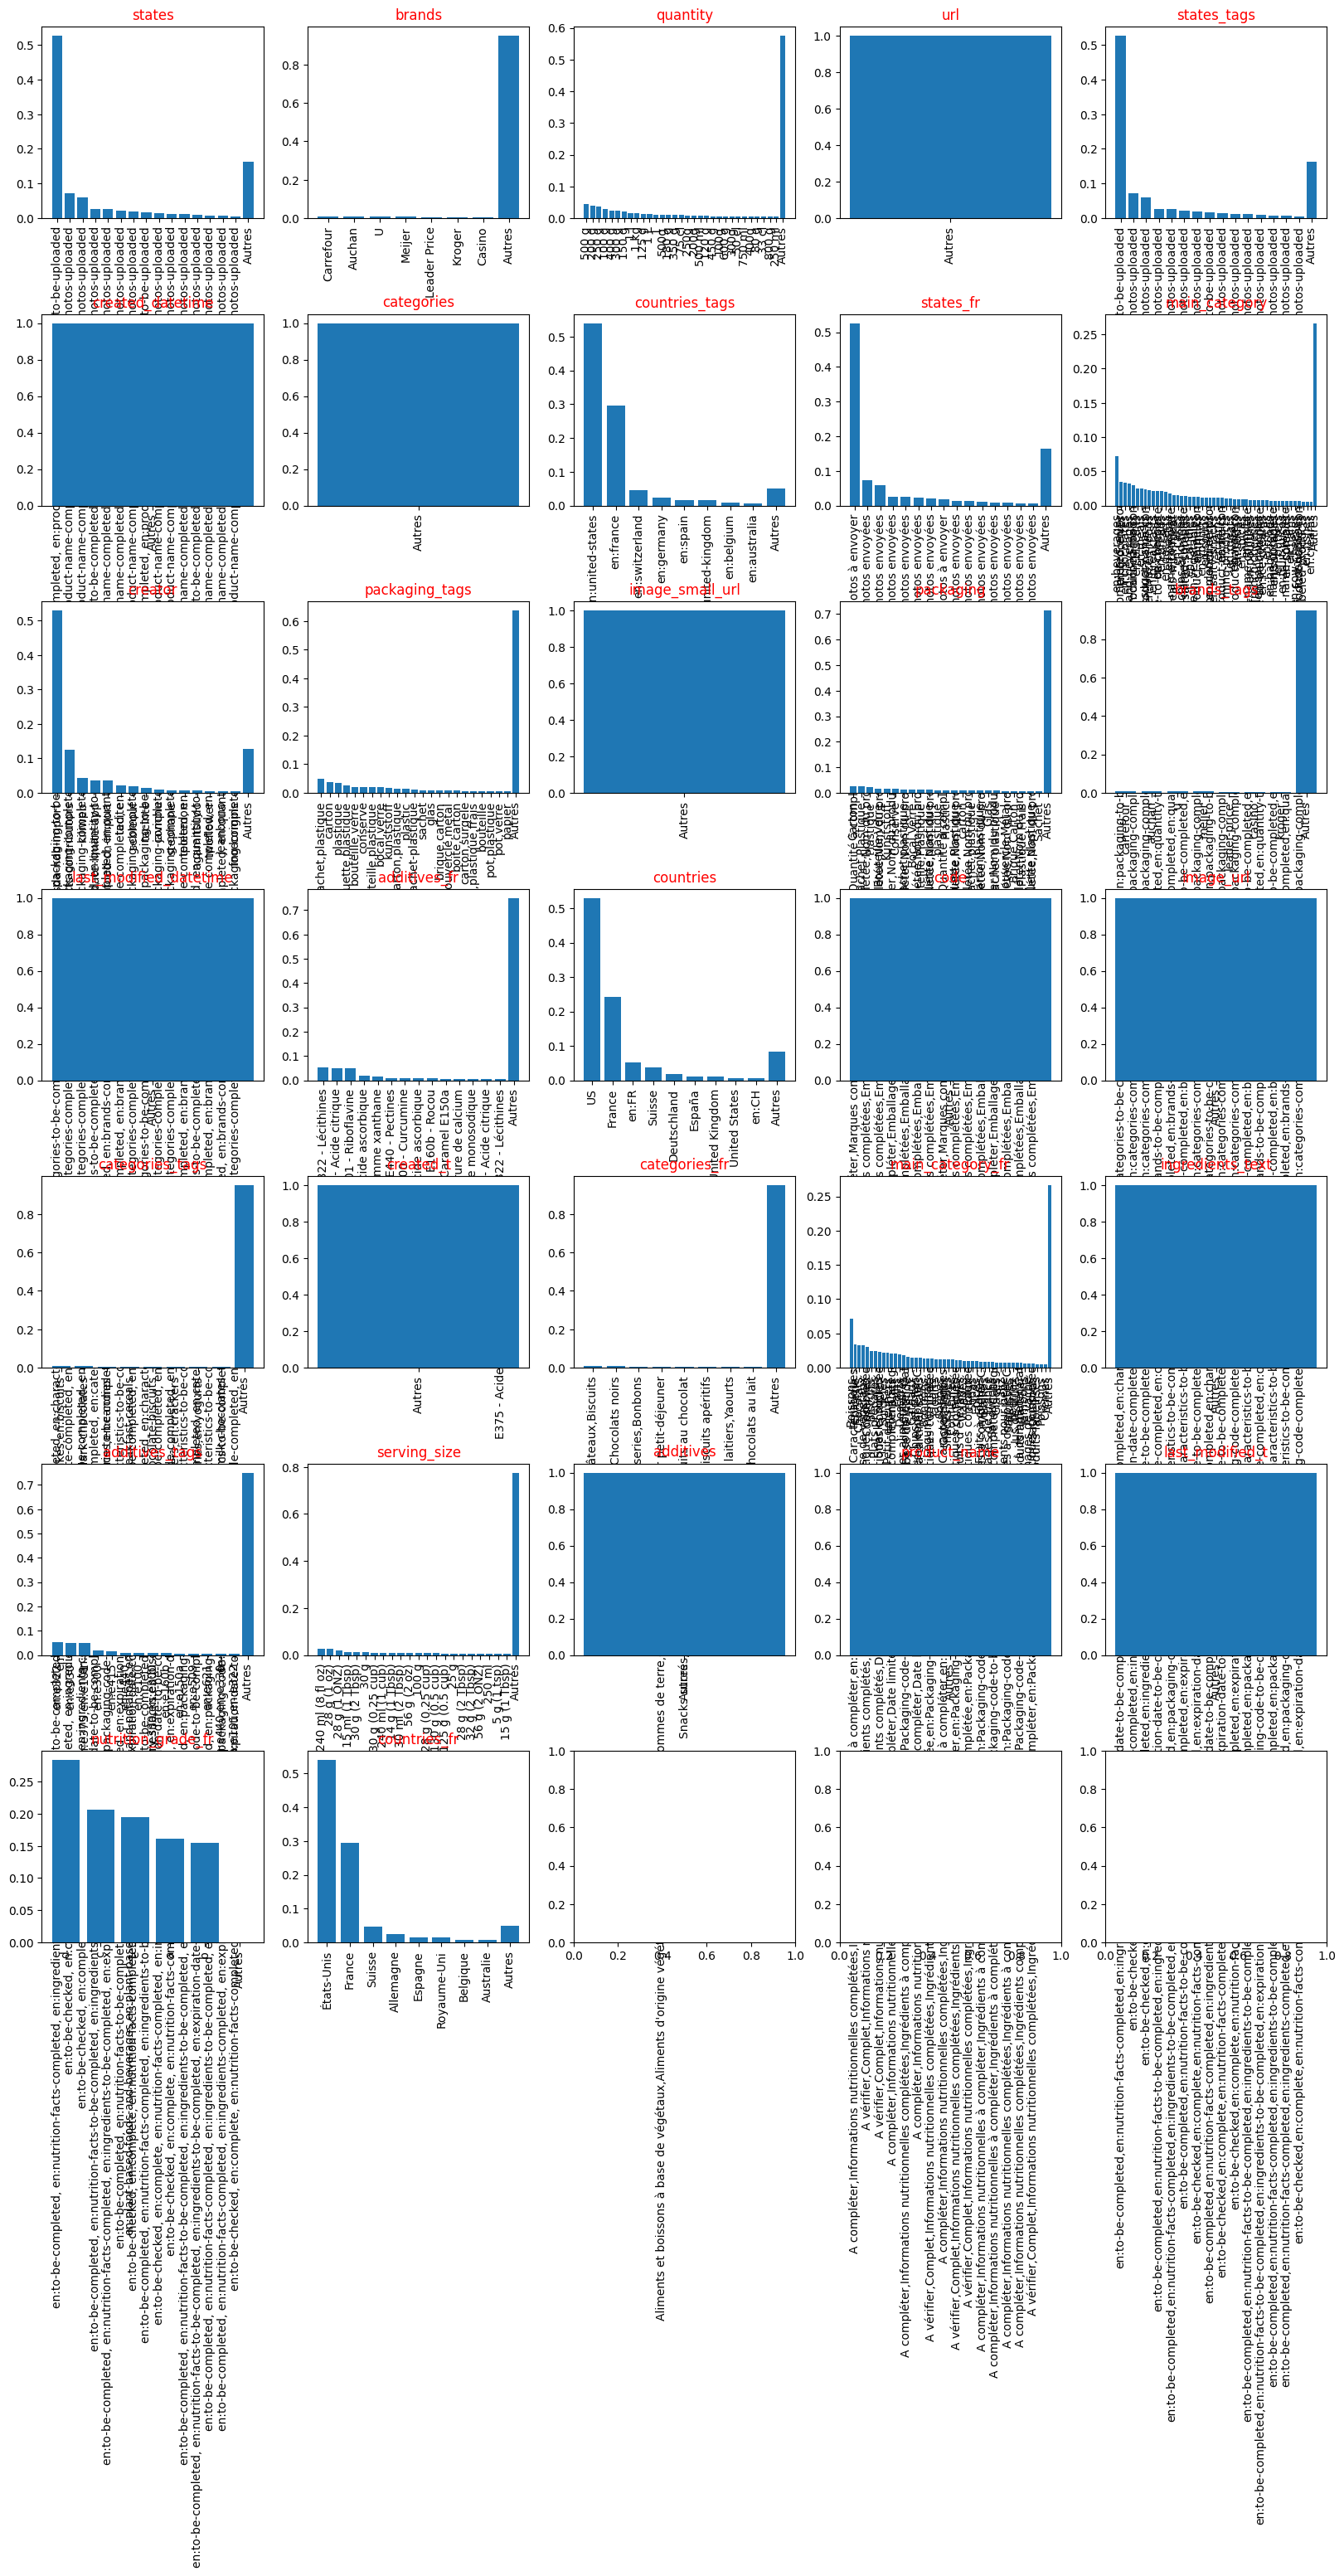

In [72]:
plt.rcParams["figure.figsize"] = (100,40)

fig, axes = plt.subplots(nrows=7, ncols=5,figsize=(20,30))



# axes est un tableau à 2 dimensions: lignes, colonnes
# pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
axes=axes.flatten()


# espace vertical entre les rangées de sous graphiques
plt.subplots_adjust(hspace=.5)
# initialisation du compteur
i=0

# for x in ['categories','packaging_tags','states']: # debug
# boucle de dessins des variables qualitatives
for x in dfQual:
    # passe les labels sur l'axe des x en arriere plan
    axes[i].xaxis.label.set_visible(False)
    
    dfCurrent=summarizeFrequenciesDf(dfQual[x],0.005)
    #print(f"[{i}]-{x}-{(len(x)/10)}") # debug

    axes[i].bar(dfCurrent[x].index,dfCurrent[x])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(x,color='red')

    i=i+1

#fig.suptitle("Données Qualitatives - Mode", fontsize=14)
plt.show()

On remarque les variables qualitatives dont les fréquences de valeurs < 5% sont majoritaires (catégorie Autre prédominante).\
Cela signifierait que ces variables n'ont pas de catégories de valeurs plus importantes que les autres.

De plus, ces variables n'apportent pas d'information sur la composition des aliments.\
=> On exclue donc les variables suivantes: last_modified_t, code, image_url, image_small_url, last_modified_date_time, ingredient_text, url, created_t, created_datetime

In [73]:
dfQualLight=dfQual.drop(['packaging','packaging_tags','last_modified_t', 'code', 'image_url', 'image_small_url', 'last_modified_datetime', 'ingredients_text', 'url', 'created_t', 'created_datetime'],axis=1)

# liste des variables qualitatives que l'on garde
colonnesQual=list(dfQualLight.columns.values)

In [74]:
dfNA80[colonnesQual]

states           brands  \
0       en:to-be-completed, en:nutrition-facts-to-be-c...  Ferme t'y R'nao   
1       en:to-be-completed, en:nutrition-facts-complet...              NaN   
2       en:to-be-completed, en:nutrition-facts-complet...   Torn & Glasser   
3       en:to-be-completed, en:nutrition-facts-complet...        Grizzlies   
4       en:to-be-completed, en:nutrition-facts-complet...   Bob's Red Mill   
...                                                   ...              ...   
320767  en:to-be-completed, en:nutrition-facts-to-be-c...         Panzani    
320768  en:to-be-completed, en:nutrition-facts-complet...     Trader Joe's   
320769  en:to-be-completed, en:nutrition-facts-to-be-c...               乐吧   
320770  en:to-be-completed, en:nutrition-facts-to-be-c...            Knorr   
320771  en:to-be-completed, en:nutrition-facts-complet...    Market Pantry   

       quantity                                        states_tags  \
0           1kg  en:to-be-completed,en:nutrition-facts-to-be-co...   
1           NaN  en:to-be-completed,en:nutrition-facts-complete...   
2           NaN  en:to-be-completed,en:nutrition-facts-complete...   
3           NaN  en:to-be-completed,en:nutrition-facts-complete...   
4           NaN  en:to-be-completed,en:nutrition-facts-complete...   
...         ...                                                ...   
320767        1  en:to-be-completed,en:nutrition-facts-to-be-co...   
320768      NaN  en:to-be-completed,en:nutrition-facts-complete...   
320769     50 g  en:to-be-completed,en:nutrition-facts-to-be-co...   
320770      67g  en:to-be-completed,en:nutrition-facts-to-be-co...   
320771      NaN  en:to-be-completed,en:nutrition-facts-complete...   

          categories    countries_tags  \
0                NaN         en:france   
1                NaN  en:united-states   
2                NaN  en:united-states   
3                NaN  en:united-states   
4                NaN  en:united-states   
...              ...               ...   
320767           NaN        en:romania   
320768           NaN  en:united-states   
320769  Potato chips          en:china   
320770           NaN         en:france   
320771           NaN  en:united-states   

                                                states_fr       main_category  \
0       A compléter,Informations nutritionnelles à com...                 NaN   
1       A compléter,Informations nutritionnelles compl...                 NaN   
2       A compléter,Informations nutritionnelles compl...                 NaN   
3       A compléter,Informations nutritionnelles compl...                 NaN   
4       A compléter,Informations nutritionnelles compl...                 NaN   
...                                                   ...                 ...   
320767  A compléter,Informations nutritionnelles à com...                 NaN   
320768  A compléter,Informations nutritionnelles compl...                 NaN   
320769  A compléter,Informations nutritionnelles à com...  en:chips-and-fries   
320770  A compléter,Informations nutritionnelles à com...                 NaN   
320771  A compléter,Informations nutritionnelles compl...                 NaN   

                           creator      brands_tags  ... countries  \
0       openfoodfacts-contributors  ferme-t-y-r-nao  ...     en:FR   
1                  usda-ndb-import              NaN  ...        US   
2                  usda-ndb-import     torn-glasser  ...        US   
3                  usda-ndb-import        grizzlies  ...        US   
4                  usda-ndb-import   bob-s-red-mill  ...        US   
...                            ...              ...  ...       ...   
320767  openfoodfacts-contributors          panzani  ...     en:RO   
320768             usda-ndb-import     trader-joe-s  ...        US   
320769                      tomato               乐吧  ...     China   
320770  openfoodfacts-contributors            knorr  ...     en:FR   
320771             usda-n

## <font color=#FB5607>Bilan du nettoyage</font>

**dataframe initial**:\
<class 'pandas.core.frame.DataFrame'>\
RangeIndex: 320772 entries, 0 to 320771\
Columns: 162 entries, code to water-hardness_100g\
dtypes: float64(106), object(56)\
memory usage: 396.5+ MB

**dataframe nettoyé**:\
<class 'pandas.core.frame.DataFrame'>\
RangeIndex: 320772 entries, 0 to 320771\
Data columns (total 37 columns):\
dtypes: float64(15), object(22)\
memory usage: 90.6+ MB

## <font color=#FB5607>Ecriture fichier CSV</font>

In [ ]:
colonnesNum4=list(set(colonnesNum3) - set(['nutrition_grade_fr'])) # on supprime la variable nutrition_grade_fr avant d'écrirer le fichier clean

# sortie fichier csv 'products_clean.csv'
dfNA80[colonnesQual+colonnesNum4].to_csv('products_clean.csv',index=False)
print(f"Elapsed: {time.time() - now}")

In [ ]:
import os
os.system('say "jai fini de travailler"')

## <font color=#FF006E>Reste a faire</font>

* Normaliser les variables avant la régression linéaire => A Faire
* Ne garder que le R2 à 0.9 => A Faire
* Exclure les outliers => A Faire
* Boite à moustache avant/après => A Faire
* Variables Qualitatives - faire le tableau de contingences (marque | produit - additif) => Fait